## Regresión

### Librerias

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install python-markdown-comments

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install jinja2


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Modelos ye structura

> KPIs

| Metric                     | Description                                    | Acceptable Range          | Why This Range                                                 |
|----------------------------|-----------------------------------------------|---------------------------|----------------------------------------------------------------|
| RMSE (Root Mean Square Error) | Measures average magnitude of error           | As low as possible, < 10,000 | Given house prices ~100k-165k, RMSE under 10k indicates <10% average error |
| MAE (Mean Absolute Error)  | Average absolute difference between predictions and actual values | < 8,000                   | Less sensitive to outliers than RMSE                          |
| R² (Coefficient of Determination) | Proportion of variance explained            | > 0.7                     | With limited data, even 0.7 indicates reasonable fit           |
| Adjusted R²               | R² adjusted for number of predictors          | > 0.6                     | Critical with small dataset to avoid overfitting              |
| MAPE (Mean Absolute Percentage Error) | Error as percentage of actual value        | < 8%                      | Provides error in percentage terms, more interpretable        |
| Cross-validation score     | Performance across different data subsets     | Consistent R² > 0.5       | Shows model generalizability (crucial with small dataset)     |
| AIC/BIC                   | Model complexity penalties                    | Lower is better, compare relatively | Helps prevent overfitting by penalizing complex models        |

#### Main metrics

1. **RMSE (Root Mean Square Error)**: Indica el promedio de la magnitud del error entre las predicciones del modelo y los valores reales. Un valor bajo refleja mayor precisión en las predicciones.
2. **MAE (Mean Absolute Error)**: Calcula el promedio de las diferencias absolutas entre las predicciones y los valores reales. Es menos sensible a outliers en comparación con el RMSE.
3. **R² (Coefficient of Determination)**: Representa la proporción de la variabilidad explicada por el modelo. Un valor cercano a 1 indica que el modelo ajusta bien los datos.
4. **Adjusted R²**: Ajusta R² considerando el número de predictores en el modelo, penalizando la inclusión de variables irrelevantes para evitar sobreajuste.
5. **MAPE (%) (Mean Absolute Percentage Error)**: Expresa el error promedio en términos porcentuales, proporcionando una interpretación más intuitiva del rendimiento del modelo.
6. **Mean CV R² (LOOCV)**: Representa el desempeño promedio del modelo en validación cruzada de Leave-One-Out, maximizando la utilización de los datos disponibles.
7. **Std CV R² (LOOCV)**: Indica la variabilidad en el desempeño del modelo durante la validación cruzada. Valores bajos reflejan mayor estabilidad.
8. **AIC/BIC**: Penalizan la complejidad del modelo al evaluar su calidad. Valores más bajos indican un modelo más eficiente en términos de predicción y simplicidad.
9. **Max Depth**: En modelos basados en árboles, define la profundidad máxima de los mismos. Un valor bajo controla la complejidad y evita el sobreajuste.
10. **Min Samples Split**: Es el número mínimo de observaciones necesarias para dividir un nodo en un árbol de decisión. Garantiza divisiones significativas.
11. **Min Samples Leaf**: Determina el número mínimo de observaciones requeridas en los nodos finales de un árbol. Evita ramas poco fiables.
12. **Number of Leaves**: Representa el total de nodos finales en un árbol. Más hojas ofrecen mayor detalle, pero pueden aumentar el riesgo de sobreajuste.


>  Modelos

#### • Lasso

[DUMMIES] Lasso regression es una técnica que utiliza un "filtro" especial llamado regularización L1 para simplificar modelos y seleccionar las variables más importantes, eliminando o "apagando" aquellas que no aportan mucho (las deja en cero). Esto es especialmente útil si tienes pocos datos pero muchas variables, ya que ayuda a evitar que el modelo se vuelva complicado o impreciso. En el caso de indicadores económicos para precios de vivienda, Lasso te señala cuáles realmente influyen, como si dijera: "Enfócate en estas variables clave y olvida el resto". En resumen, es como ordenar un armario lleno de ropa: te quedas solo con lo esencial y práctico. Además, usando LOOCV (Leave-One-Out Cross-Validation), aprovechas al máximo tus datos mientras validas el modelo.

[TFM] La regresión Lasso utiliza la regularización L1 como un mecanismo para seleccionar las variables más relevantes en un modelo predictivo (los vuelve a cero). Al aplicar penalizaciones a los coeficientes de las variables, fuerza a que algunos se reduzcan a cero, eliminando aquellas variables que tienen menor impacto. Esto es especialmente útil en conjuntos de datos pequeños con muchas variables potenciales, ya que reduce la dimensionalidad del modelo y ayuda a evitar el sobreajuste. En el contexto de los indicadores económicos y su relación con los precios de vivienda, Lasso permite identificar de forma precisa cuáles variables tienen un impacto significativo en los resultados, optimizando el análisis y la interpretación del modelo. Además, el uso de LOOCV (Leave-One-Out Cross-Validation) permite maximizar el uso del conjunto de datos para entrenamiento, mientras se proporciona un mecanismo robusto de validación. Cada métrica puede evaluarse frente a umbrales recomendados para garantizar la calidad del modelo.

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+06, tolerance: 7.693e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.314e+06, tolerance: 7.228e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Best alpha value: 10.0

===== MODEL EVALUATION METRICS =====
            Metric       Value Acceptable Range         Status
              RMSE 1013.161633         < 10,000           Good
               MAE  843.279394          < 8,000           Good
                R²    0.998685            > 0.7           Good
       Adjusted R²    0.994740            > 0.6           Good
          MAPE (%)    0.708700             < 8%           Good
Mean CV R² (LOOCV)         NaN            > 0.5           Poor
 Std CV R² (LOOCV)         NaN  Lower is better            N/A
               AIC  199.941607   Compare models Compare models
               BIC  205.591101   Compare models Compare models

===== LASSO SELECTED FEATURES =====
Number of features selected: 9 out of 9
                              Feature  Coefficient  Absolute Value  Importance (%)
                            Poblacion    8148.3278       8148.3278         20.7110
                       PIB_per_capita    6979.5414       6979.5414

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:126

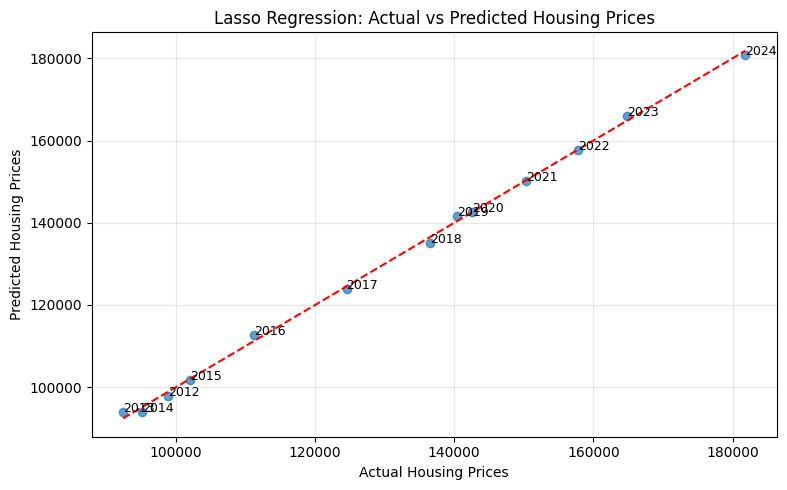

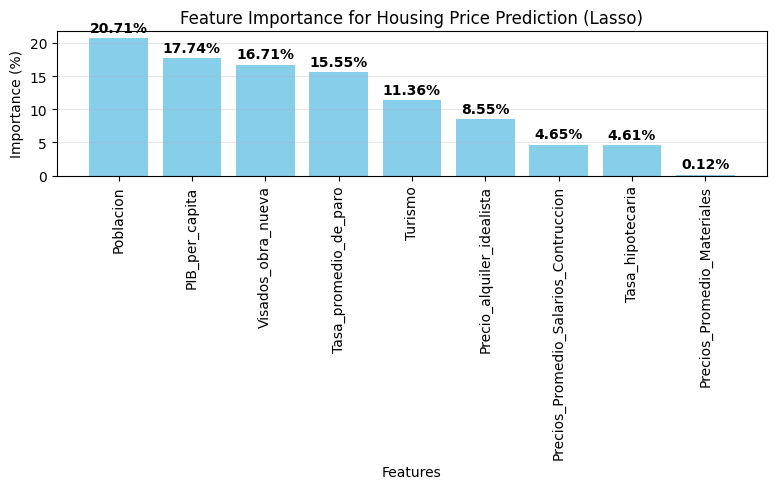

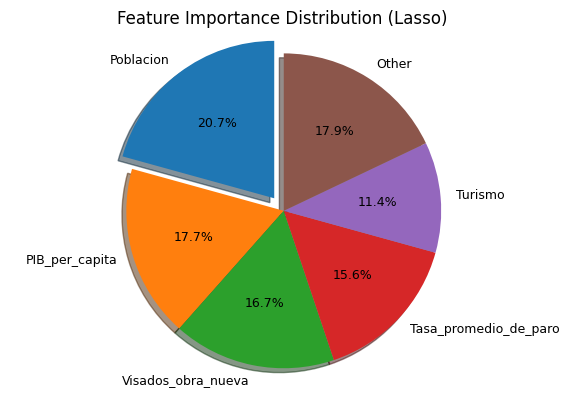

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import GridSearchCV

ruta_archivo = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\datos_regresion_con_turismo_madrid.xlsx'
df = pd.read_excel(ruta_archivo)

X = df.drop(['year', 'Precio_vivienda'], axis=1)
y = df['Precio_vivienda']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

param_grid = {'alpha': np.logspace(-4, 1, 20)}
lasso_cv = GridSearchCV(
    Lasso(random_state=42, max_iter=10000), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)
lasso_cv.fit(X_scaled, y)
best_alpha = lasso_cv.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

lasso = Lasso(alpha=best_alpha, random_state=42, max_iter=10000)
lasso.fit(X_scaled, y)

y_pred = lasso.predict(X_scaled)

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) * 100  

n = len(y)  
p = X.shape[1]  
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

residual_sum_of_squares = np.sum((y - y_pred) ** 2)
aic = n * np.log(residual_sum_of_squares / n) + 2 * (np.sum(lasso.coef_ != 0) + 1)  # +1 for intercept
bic = n * np.log(residual_sum_of_squares / n) + np.log(n) * (np.sum(lasso.coef_ != 0) + 1)

loo = LeaveOneOut()
cv_scores = cross_val_score(
    Lasso(alpha=best_alpha, random_state=42, max_iter=10000), 
    X_scaled, 
    y, 
    cv=loo, 
    scoring='r2'
)
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²', 'Adjusted R²', 'MAPE (%)', 'Mean CV R² (LOOCV)', 'Std CV R² (LOOCV)', 'AIC', 'BIC'],
    'Value': [rmse, mae, r2, adjusted_r2, mape, mean_cv_r2, std_cv_r2, aic, bic],
    'Acceptable Range': ['< 10,000', '< 8,000', '> 0.7', '> 0.6', '< 8%', '> 0.5', 'Lower is better', 'Compare models', 'Compare models'],
    'Status': [
        'Good' if rmse < 10000 else 'Poor',
        'Good' if mae < 8000 else 'Poor',
        'Good' if r2 > 0.7 else 'Poor',
        'Good' if adjusted_r2 > 0.6 else 'Poor',
        'Good' if mape < 8 else 'Poor',
        'Good' if mean_cv_r2 > 0.5 else 'Poor',
        'N/A',
        'Compare models',
        'Compare models'
    ]
})

print("\n===== MODEL EVALUATION METRICS =====")
print(metrics_df.to_string(index=False))

coefficients = lasso.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Value': np.abs(coefficients)
})
coef_df = coef_df.sort_values('Absolute Value', ascending=False)

total_abs_coef = coef_df['Absolute Value'].sum()
coef_df['Importance (%)'] = coef_df['Absolute Value'] / total_abs_coef * 100

non_zero_coef_df = coef_df[coef_df['Coefficient'] != 0]
print("\n===== LASSO SELECTED FEATURES =====")
print(f"Number of features selected: {len(non_zero_coef_df)} out of {len(feature_names)}")
print(non_zero_coef_df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

importance_table = non_zero_coef_df[['Feature', 'Importance (%)']]
importance_table['Importance (%)'] = importance_table['Importance (%)'].round(2)
importance_table = importance_table.sort_values('Importance (%)', ascending=False)

print("\n===== FEATURE IMPORTANCE TABLE =====")
print(importance_table.to_string(index=False))

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('Lasso Regression: Actual vs Predicted Housing Prices')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y.iloc[i], y_pred[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

if len(non_zero_coef_df) > 0:
    plt.figure(figsize=(8, 5))
    plt.bar(
        non_zero_coef_df['Feature'], 
        non_zero_coef_df['Importance (%)'], 
        color='skyblue'
    )
    plt.title('Feature Importance for Housing Price Prediction (Lasso)')
    plt.xlabel('Features')
    plt.ylabel('Importance (%)')
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(non_zero_coef_df['Importance (%)']):
        plt.text(
            i, 
            v + 0.5, 
            f"{v:.2f}%", 
            ha='center', 
            va='bottom', 
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

if len(non_zero_coef_df) > 0:
    plt.figure(figsize=(6, 4))
    
    if len(non_zero_coef_df) > 5:
        top5_features = non_zero_coef_df.iloc[:5]
        other_features = non_zero_coef_df.iloc[5:]
        
        other_importance = other_features['Importance (%)'].sum()
        
        labels = list(top5_features['Feature']) + ['Other']
        sizes = list(top5_features['Importance (%)']) + [other_importance]
        
        explode = [0.1] + [0] * (len(labels) - 1)
    else:
        labels = non_zero_coef_df['Feature']
        sizes = non_zero_coef_df['Importance (%)']
        explode = [0.1] + [0] * (len(labels) - 1)
    
    plt.pie(
        sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 9}
    )
    plt.axis('equal')  
    plt.title('Feature Importance Distribution (Lasso)')
    plt.tight_layout()
    plt.show()

#### • Multi LinearRegression

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:126


===== MODEL EVALUATION METRICS =====
            Metric       Value Acceptable Range         Status
              RMSE 1007.443173         < 10,000           Good
               MAE  817.582944          < 8,000           Good
                R²    0.998700            > 0.7           Good
       Adjusted R²    0.994799            > 0.6           Good
          MAPE (%)    0.693048             < 8%           Good
Mean CV R² (LOOCV)         NaN            > 0.5           Poor
 Std CV R² (LOOCV)         NaN  Lower is better            N/A
               AIC  236.686845   Compare models Compare models
               BIC  242.336339   Compare models Compare models

===== MULTIPLE LINEAR REGRESSION COEFFICIENTS =====
                              Feature  Coefficient  F-Score  P-Value  Importance (%)
            Precio_alquiler_idealista     771.2878 158.6612   0.0000         30.2296
                Tasa_promedio_de_paro   -7554.3899 137.9309   0.0000         26.2799
                        

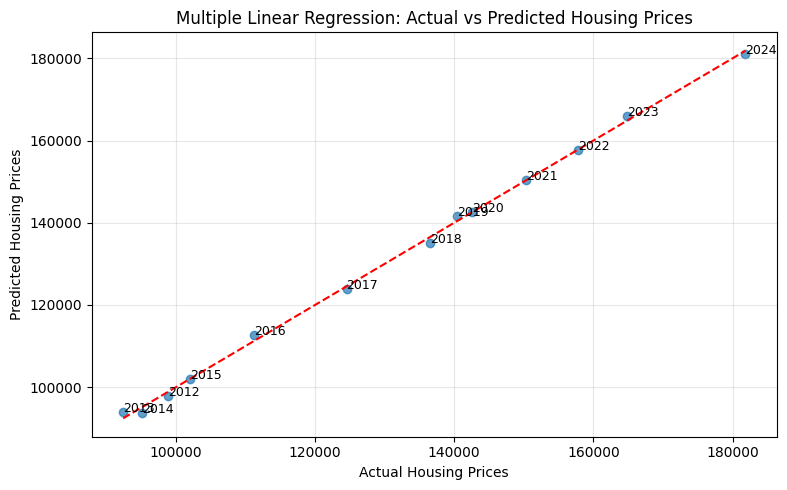

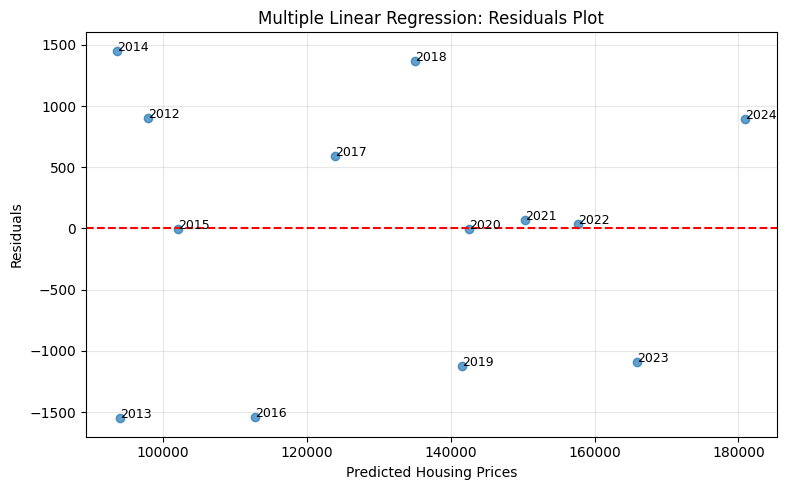

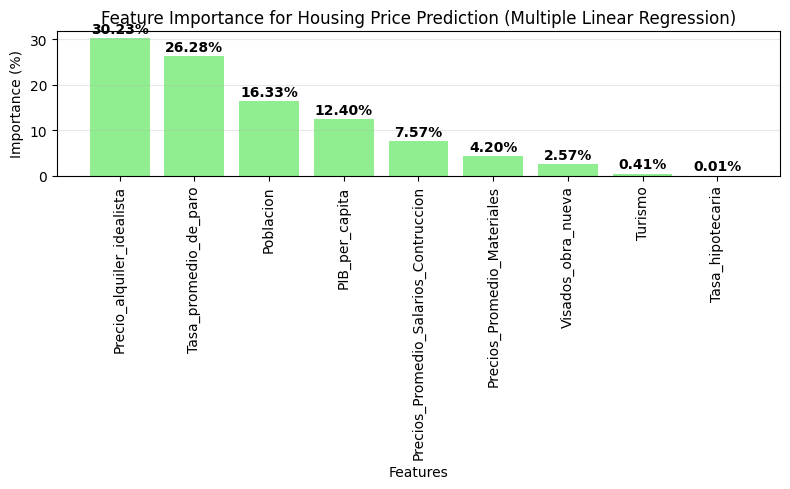

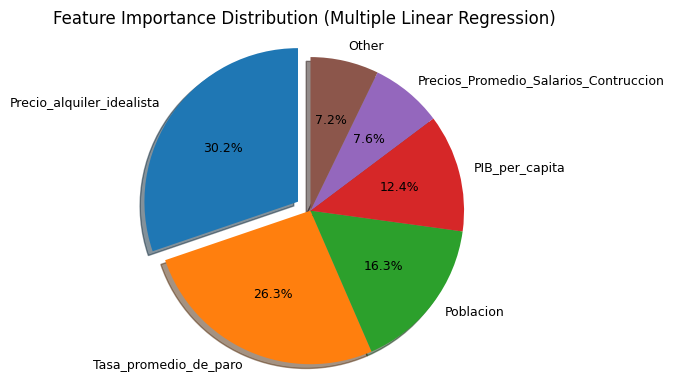

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
import math
import statsmodels.api as sm

ruta_archivo = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\datos_regresion_con_turismo_madrid.xlsx'
df = pd.read_excel(ruta_archivo)

X = df.drop(['year', 'Precio_vivienda'], axis=1)
y = df['Precio_vivienda']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

mlr = LinearRegression()
mlr.fit(X_scaled, y)

y_pred = mlr.predict(X_scaled)

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) * 100  

n = len(y)  
p = X.shape[1] 
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

X_with_const = sm.add_constant(X_scaled)
sm_model = sm.OLS(y, X_with_const).fit()
aic = sm_model.aic
bic = sm_model.bic

loo = LeaveOneOut()
cv_scores = cross_val_score(
    LinearRegression(), 
    X_scaled, 
    y, 
    cv=loo, 
    scoring='r2'
)
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²', 'Adjusted R²', 'MAPE (%)', 'Mean CV R² (LOOCV)', 'Std CV R² (LOOCV)', 'AIC', 'BIC'],
    'Value': [rmse, mae, r2, adjusted_r2, mape, mean_cv_r2, std_cv_r2, aic, bic],
    'Acceptable Range': ['< 10,000', '< 8,000', '> 0.7', '> 0.6', '< 8%', '> 0.5', 'Lower is better', 'Compare models', 'Compare models'],
    'Status': [
        'Good' if rmse < 10000 else 'Poor',
        'Good' if mae < 8000 else 'Poor',
        'Good' if r2 > 0.7 else 'Poor',
        'Good' if adjusted_r2 > 0.6 else 'Poor',
        'Good' if mape < 8 else 'Poor',
        'Good' if mean_cv_r2 > 0.5 else 'Poor',
        'N/A',
        'Compare models',
        'Compare models'
    ]
})

print("\n===== MODEL EVALUATION METRICS =====")
print(metrics_df.to_string(index=False))

coefficients = mlr.coef_
feature_names = X.columns

f_scores, p_values = f_regression(X_scaled, y)
importance = f_scores / np.sum(f_scores)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'F-Score': f_scores,
    'P-Value': p_values,
    'Importance (%)': importance * 100
})
coef_df = coef_df.sort_values('Importance (%)', ascending=False)

print("\n===== MULTIPLE LINEAR REGRESSION COEFFICIENTS =====")
print(coef_df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

importance_table = coef_df[['Feature', 'Importance (%)']]
importance_table['Importance (%)'] = importance_table['Importance (%)'].round(2)
importance_table = importance_table.sort_values('Importance (%)', ascending=False)

print("\n===== FEATURE IMPORTANCE TABLE =====")
print(importance_table.to_string(index=False))

print("\n===== DETAILED STATISTICS =====")
print(sm_model.summary())

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title('Multiple Linear Regression: Actual vs Predicted Housing Prices')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y.iloc[i], y_pred[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Residuals')
plt.title('Multiple Linear Regression: Residuals Plot')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y_pred[i], residuals.iloc[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(
    coef_df['Feature'], 
    coef_df['Importance (%)'], 
    color='lightgreen'
)
plt.title('Feature Importance for Housing Price Prediction (Multiple Linear Regression)')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(coef_df['Importance (%)']):
    plt.text(
        i, 
        v + 0.5, 
        f"{v:.2f}%", 
        ha='center', 
        va='bottom', 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))

if len(coef_df) > 5:
    top5_features = coef_df.iloc[:5]
    other_features = coef_df.iloc[5:]
    
    other_importance = other_features['Importance (%)'].sum()
    
    labels = list(top5_features['Feature']) + ['Other']
    sizes = list(top5_features['Importance (%)']) + [other_importance]
    
    explode = [0.1] + [0] * (len(labels) - 1)
else:
    labels = coef_df['Feature']
    sizes = coef_df['Importance (%)']
    explode = [0.1] + [0] * (len(labels) - 1)

plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 9}
)
plt.axis('equal')  
plt.title('Feature Importance Distribution (Multiple Linear Regression)')
plt.tight_layout()
plt.show()

#### • Ridge

[DUMMIES] Ridge regression es como un modelo que no solo predice, sino que también evita equivocarse demasiado. Para lograrlo, usa un "freno" especial llamado regularización L2 (minimizador), que le dice al modelo que no confíe demasiado en ninguna variable. Esto es muy útil cuando varias variables están relacionadas entre sí (como ingresos y gasto familiar), porque maneja bien esas conexiones sin ponerse confuso. A diferencia de otros métodos, Ridge no elimina variables, solo reduce su impacto un poco. Es ideal cuando tienes pocos datos pero no quieres dejar fuera información valiosa.

[TFM] La regresión Ridge aplica la regularización L2 (minimizador) para reducir el riesgo de sobreajuste, penalizando los coeficientes de las variables sin eliminarlas por completo. Es especialmente eficaz al manejar problemas de multicolinealidad, donde las variables predictoras están correlacionadas. Este enfoque minimiza el sesgo mientras mantiene todas las variables en el modelo, lo que resulta útil en conjuntos de datos pequeños, ya que preserva la mayor cantidad de información posible al reducir el impacto de valores extremos.

Best alpha value: 0.0379269019073225

===== MODEL EVALUATION METRICS =====
            Metric       Value Acceptable Range         Status
              RMSE 1021.861749         < 10,000           Good
               MAE  853.398369          < 8,000           Good
                R²    0.998662            > 0.7           Good
       Adjusted R²    0.994649            > 0.6           Good
          MAPE (%)    0.710846             < 8%           Good
Mean CV R² (LOOCV)         NaN            > 0.5           Poor
 Std CV R² (LOOCV)         NaN  Lower is better            N/A
               AIC  236.686845   Compare models Compare models
               BIC  242.336339   Compare models Compare models
             Alpha    0.037927              N/A            N/A

===== RIDGE REGRESSION COEFFICIENTS =====
                              Feature  Coefficient  Absolute Value  Importance (%)
                            Poblacion    7996.3441       7996.3441         28.7782
                   Visa

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:126

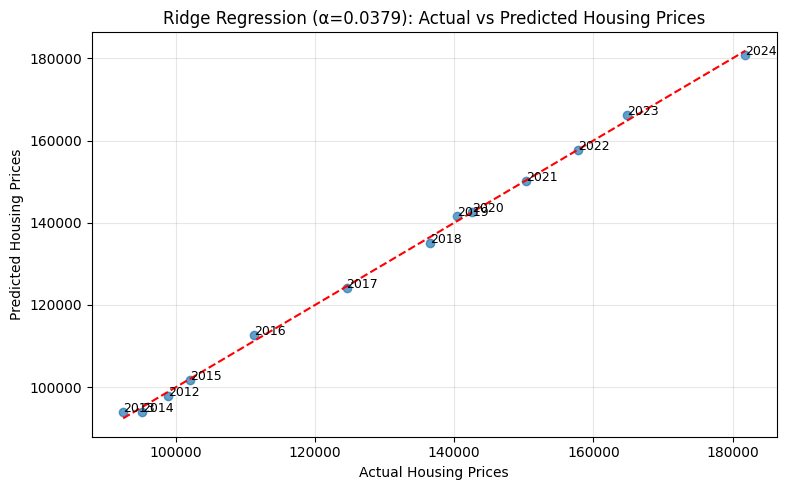

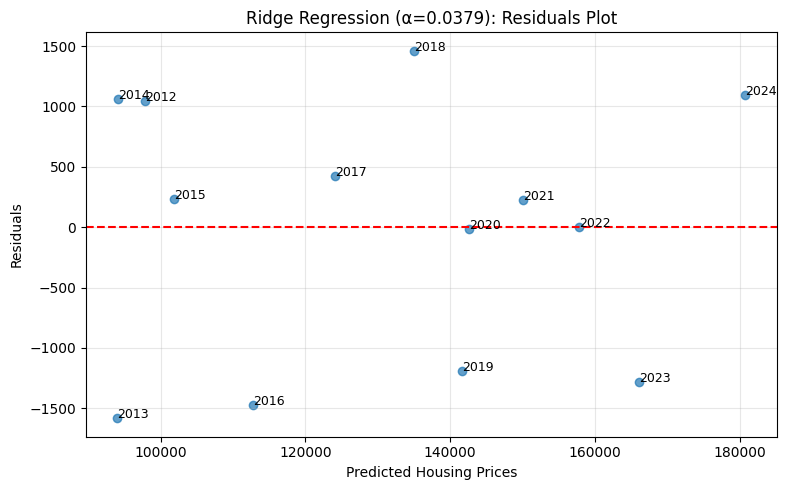


===== COEFFICIENT SHRINKAGE COMPARISON =====
                              Feature  Ridge Coefficient  OLS Coefficient  Difference  Shrinkage (%)
          Precios_Promedio_Materiales           327.8777       -2548.3822   2876.2599        87.1339
Precios_Promedio_Salarios_Contruccion          1863.4182        6190.0822  -4326.6641        69.8967
                     Tasa_hipotecaria          1736.6778        2323.0736   -586.3958        25.2422
                Tasa_promedio_de_paro         -6139.6713       -7554.3899   1414.7186        18.7271
                       PIB_per_capita          6058.0626        7300.8768  -1242.8142        17.0228
                              Turismo         -4331.6278       -5007.3596    675.7318        13.4948
                   Visados_obra_nueva          6429.5799        7107.0364   -677.4565         9.5322
                            Poblacion          7996.3441        7039.7858    956.5583       -13.5879
            Precio_alquiler_idealista        

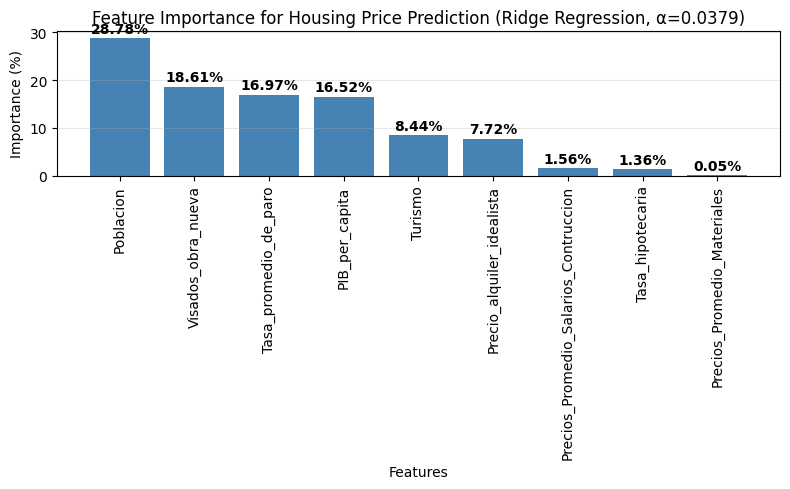

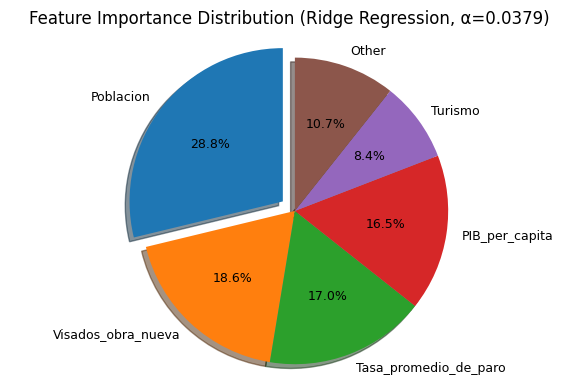

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm

ruta_archivo = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\datos_regresion_con_turismo_madrid.xlsx'
df = pd.read_excel(ruta_archivo)

X = df.drop(['year', 'Precio_vivienda'], axis=1)
y = df['Precio_vivienda']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

param_grid = {'alpha': np.logspace(-4, 3, 20)}
ridge_cv = GridSearchCV(
    Ridge(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)
ridge_cv.fit(X_scaled, y)
best_alpha = ridge_cv.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")


ridge = Ridge(alpha=best_alpha, random_state=42)
ridge.fit(X_scaled, y)

y_pred = ridge.predict(X_scaled)

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) * 100  

n = len(y)  
p = X.shape[1] 
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

X_with_const = sm.add_constant(X_scaled)
sm_model = sm.OLS(y, X_with_const).fit()
aic = sm_model.aic
bic = sm_model.bic

loo = LeaveOneOut()
cv_scores = cross_val_score(
    Ridge(alpha=best_alpha, random_state=42), 
    X_scaled, 
    y, 
    cv=loo, 
    scoring='r2'
)
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²', 'Adjusted R²', 'MAPE (%)', 'Mean CV R² (LOOCV)', 'Std CV R² (LOOCV)', 'AIC', 'BIC', 'Alpha'],
    'Value': [rmse, mae, r2, adjusted_r2, mape, mean_cv_r2, std_cv_r2, aic, bic, best_alpha],
    'Acceptable Range': ['< 10,000', '< 8,000', '> 0.7', '> 0.6', '< 8%', '> 0.5', 'Lower is better', 'Compare models', 'Compare models', 'N/A'],
    'Status': [
        'Good' if rmse < 10000 else 'Poor',
        'Good' if mae < 8000 else 'Poor',
        'Good' if r2 > 0.7 else 'Poor',
        'Good' if adjusted_r2 > 0.6 else 'Poor',
        'Good' if mape < 8 else 'Poor',
        'Good' if mean_cv_r2 > 0.5 else 'Poor',
        'N/A',
        'Compare models',
        'Compare models',
        'N/A'
    ]
})

print("\n===== MODEL EVALUATION METRICS =====")
print(metrics_df.to_string(index=False))

coefficients = ridge.coef_
feature_names = X.columns

squared_coef = coefficients ** 2
importance = squared_coef / np.sum(squared_coef) * 100

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Value': np.abs(coefficients),
    'Importance (%)': importance
})
coef_df = coef_df.sort_values('Importance (%)', ascending=False)

print("\n===== RIDGE REGRESSION COEFFICIENTS =====")
print(coef_df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

importance_table = coef_df[['Feature', 'Importance (%)']]
importance_table['Importance (%)'] = importance_table['Importance (%)'].round(2)
importance_table = importance_table.sort_values('Importance (%)', ascending=False)

print("\n===== FEATURE IMPORTANCE TABLE =====")
print(importance_table.to_string(index=False))

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title(f'Ridge Regression (α={best_alpha:.4f}): Actual vs Predicted Housing Prices')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y.iloc[i], y_pred[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Residuals')
plt.title(f'Ridge Regression (α={best_alpha:.4f}): Residuals Plot')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y_pred[i], residuals.iloc[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

lr = sm.OLS(y, X_with_const).fit()
ols_coef = lr.params[1:] 

coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficient': ridge.coef_,
    'OLS Coefficient': ols_coef,
    'Difference': ridge.coef_ - ols_coef,
    'Shrinkage (%)': (1 - np.abs(ridge.coef_)/np.abs(ols_coef)) * 100
})
coef_comparison = coef_comparison.sort_values('Shrinkage (%)', ascending=False)

print("\n===== COEFFICIENT SHRINKAGE COMPARISON =====")
print(coef_comparison.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

plt.figure(figsize=(8, 5))
plt.bar(
    coef_df['Feature'], 
    coef_df['Importance (%)'], 
    color='steelblue'
)
plt.title(f'Feature Importance for Housing Price Prediction (Ridge Regression, α={best_alpha:.4f})')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(coef_df['Importance (%)']):
    plt.text(
        i, 
        v + 0.5, 
        f"{v:.2f}%", 
        ha='center', 
        va='bottom', 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))

if len(coef_df) > 5:
    top5_features = coef_df.iloc[:5]
    other_features = coef_df.iloc[5:]
    
    other_importance = other_features['Importance (%)'].sum()
    
    labels = list(top5_features['Feature']) + ['Other']
    sizes = list(top5_features['Importance (%)']) + [other_importance]
    
    explode = [0.1] + [0] * (len(labels) - 1)
else:
    labels = coef_df['Feature']
    sizes = coef_df['Importance (%)']
    explode = [0.1] + [0] * (len(labels) - 1)

plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 9}
)
plt.axis('equal') 
plt.title(f'Feature Importance Distribution (Ridge Regression, α={best_alpha:.4f})')
plt.tight_layout()
plt.show()

#### • Elastic Net

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.087e+06, tolerance: 9.662e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+06, tolerance: 7.693e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Best alpha value: 0.046415888336127774
Best L1 ratio: 0.9

===== MODEL EVALUATION METRICS =====
            Metric       Value Acceptable Range         Status
              RMSE 1032.312083         < 10,000           Good
               MAE  866.432725          < 8,000           Good
                R²    0.998635            > 0.7           Good
       Adjusted R²    0.994539            > 0.6           Good
          MAPE (%)    0.715777             < 8%           Good
Mean CV R² (LOOCV)         NaN            > 0.5           Poor
 Std CV R² (LOOCV)         NaN  Lower is better            N/A
               AIC  200.428464   Compare models Compare models
               BIC  206.077958   Compare models Compare models
             Alpha    0.046416              N/A            N/A
          L1 Ratio    0.900000              N/A            N/A
 Features Selected    9.000000              N/A            N/A

===== ELASTIC NET SELECTED FEATURES =====
Number of features selected: 9 out of 9
  

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:126

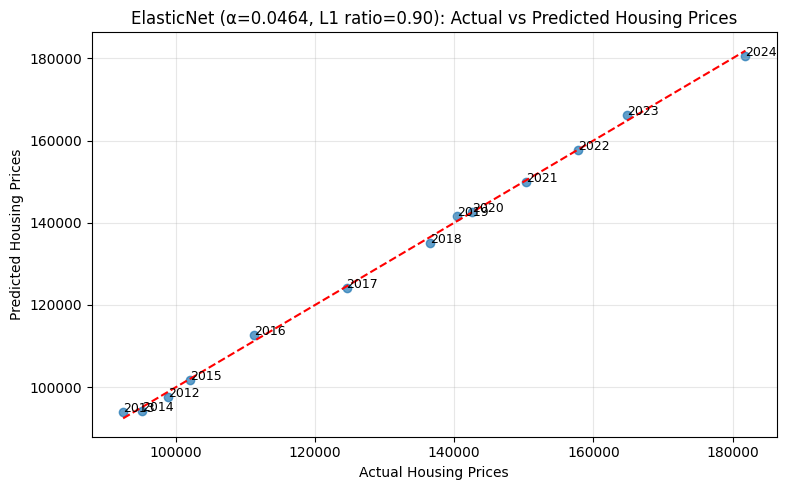

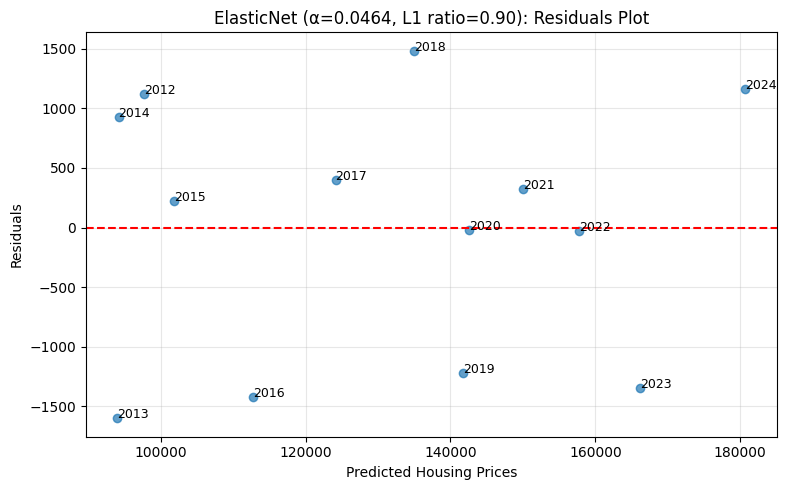

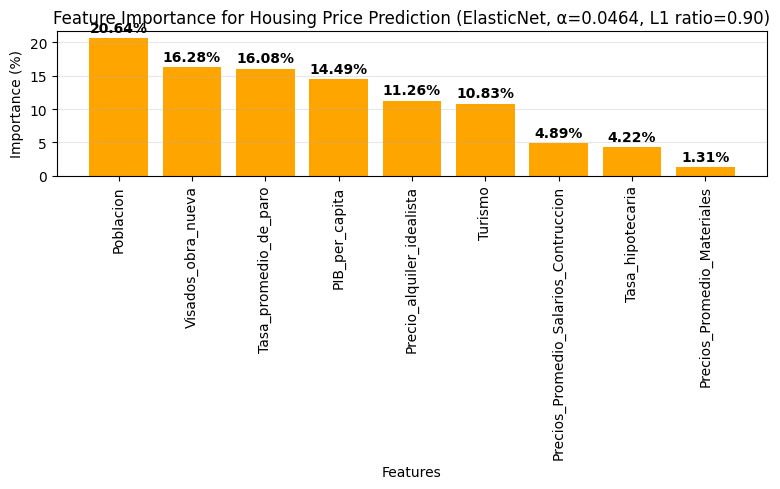

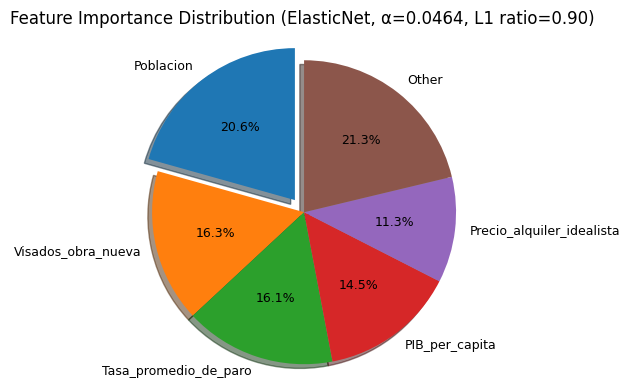


===== ELASTICNET MODEL SUMMARY =====
Alpha: 0.046415888336127774
L1 Ratio: 0.9
Features Selected: ['Poblacion', 'Visados_obra_nueva', 'Tasa_promedio_de_paro', 'PIB_per_capita', 'Precio_alquiler_idealista', 'Turismo', 'Precios_Promedio_Salarios_Contruccion', 'Tasa_hipotecaria', 'Precios_Promedio_Materiales']
R²: 0.9986
Adjusted R²: 0.9945
RMSE: 1032.31
Cross-validation R²: nan (±nan)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm

ruta_archivo = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\datos_regresion_con_turismo_madrid.xlsx'
df = pd.read_excel(ruta_archivo)

X = df.drop(['year', 'Precio_vivienda'], axis=1)
y = df['Precio_vivienda']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

param_grid = {
    'alpha': np.logspace(-4, 2, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 9)  
}
elastic_cv = GridSearchCV(
    ElasticNet(random_state=42, max_iter=10000), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)
elastic_cv.fit(X_scaled, y)
best_alpha = elastic_cv.best_params_['alpha']
best_l1_ratio = elastic_cv.best_params_['l1_ratio']
print(f"Best alpha value: {best_alpha}")
print(f"Best L1 ratio: {best_l1_ratio}")

elastic = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42, max_iter=10000)
elastic.fit(X_scaled, y)

y_pred = elastic.predict(X_scaled)

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) * 100  

n = len(y)  
p = X.shape[1]  
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

residual_sum_of_squares = np.sum((y - y_pred) ** 2)
non_zero_coef = np.sum(elastic.coef_ != 0)
aic = n * np.log(residual_sum_of_squares / n) + 2 * (non_zero_coef + 1)  # +1 for intercept
bic = n * np.log(residual_sum_of_squares / n) + np.log(n) * (non_zero_coef + 1)

loo = LeaveOneOut()
cv_scores = cross_val_score(
    ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42, max_iter=10000), 
    X_scaled, 
    y, 
    cv=loo, 
    scoring='r2'
)
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²', 'Adjusted R²', 'MAPE (%)', 'Mean CV R² (LOOCV)', 'Std CV R² (LOOCV)', 
               'AIC', 'BIC', 'Alpha', 'L1 Ratio', 'Features Selected'],
    'Value': [rmse, mae, r2, adjusted_r2, mape, mean_cv_r2, std_cv_r2, 
             aic, bic, best_alpha, best_l1_ratio, non_zero_coef],
    'Acceptable Range': ['< 10,000', '< 8,000', '> 0.7', '> 0.6', '< 8%', '> 0.5', 'Lower is better', 
                        'Compare models', 'Compare models', 'N/A', 'N/A', 'N/A'],
    'Status': [
        'Good' if rmse < 10000 else 'Poor',
        'Good' if mae < 8000 else 'Poor',
        'Good' if r2 > 0.7 else 'Poor',
        'Good' if adjusted_r2 > 0.6 else 'Poor',
        'Good' if mape < 8 else 'Poor',
        'Good' if mean_cv_r2 > 0.5 else 'Poor',
        'N/A',
        'Compare models',
        'Compare models',
        'N/A',
        'N/A',
        'N/A'
    ]
})

print("\n===== MODEL EVALUATION METRICS =====")
print(metrics_df.to_string(index=False))

coefficients = elastic.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Value': np.abs(coefficients)
})

non_zero_coef_df = coef_df[coef_df['Coefficient'] != 0]
non_zero_coef_df = non_zero_coef_df.sort_values('Absolute Value', ascending=False)

total_abs_coef = non_zero_coef_df['Absolute Value'].sum()
non_zero_coef_df['Importance (%)'] = non_zero_coef_df['Absolute Value'] / total_abs_coef * 100

print("\n===== ELASTIC NET SELECTED FEATURES =====")
print(f"Number of features selected: {len(non_zero_coef_df)} out of {len(feature_names)}")
print(non_zero_coef_df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

importance_table = non_zero_coef_df[['Feature', 'Importance (%)']]
importance_table['Importance (%)'] = importance_table['Importance (%)'].round(2)
importance_table = importance_table.sort_values('Importance (%)', ascending=False)

print("\n===== FEATURE IMPORTANCE TABLE =====")
print(importance_table.to_string(index=False))

X_with_const = sm.add_constant(X_scaled)
ols_model = sm.OLS(y, X_with_const).fit()

features_selected = non_zero_coef_df['Feature'].tolist()
ols_coef = ols_model.params[1:]  
feature_idx = {name: i for i, name in enumerate(feature_names)}

coef_comparison = pd.DataFrame({
    'Feature': features_selected,
    'ElasticNet Coefficient': [elastic.coef_[feature_idx[f]] for f in features_selected],
    'OLS Coefficient': [ols_coef[feature_idx[f]] for f in features_selected],
    'Difference': [elastic.coef_[feature_idx[f]] - ols_coef[feature_idx[f]] for f in features_selected],
    'Shrinkage (%)': [(1 - np.abs(elastic.coef_[feature_idx[f]])/np.abs(ols_coef[feature_idx[f]])) * 100 for f in features_selected]
})
coef_comparison = coef_comparison.sort_values('Shrinkage (%)', ascending=False)

print("\n===== COEFFICIENT SHRINKAGE COMPARISON (SELECTED FEATURES) =====")
print(coef_comparison.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title(f'ElasticNet (α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f}): Actual vs Predicted Housing Prices')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y.iloc[i], y_pred[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Residuals')
plt.title(f'ElasticNet (α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f}): Residuals Plot')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y_pred[i], residuals.iloc[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

if len(non_zero_coef_df) > 0:
    plt.figure(figsize=(8, 5))
    plt.bar(
        non_zero_coef_df['Feature'], 
        non_zero_coef_df['Importance (%)'], 
        color='orange'
    )
    plt.title(f'Feature Importance for Housing Price Prediction (ElasticNet, α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f})')
    plt.xlabel('Features')
    plt.ylabel('Importance (%)')
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(non_zero_coef_df['Importance (%)']):
        plt.text(
            i, 
            v + 0.5, 
            f"{v:.2f}%", 
            ha='center', 
            va='bottom', 
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

if len(non_zero_coef_df) > 0:
    plt.figure(figsize=(6, 4))
    
    if len(non_zero_coef_df) > 5:
        top5_features = non_zero_coef_df.iloc[:5]
        other_features = non_zero_coef_df.iloc[5:]
        
        other_importance = other_features['Importance (%)'].sum()
        
        labels = list(top5_features['Feature']) + ['Other']
        sizes = list(top5_features['Importance (%)']) + [other_importance]
        
        explode = [0.1] + [0] * (len(labels) - 1)
    else:
        labels = non_zero_coef_df['Feature']
        sizes = non_zero_coef_df['Importance (%)']
        explode = [0.1] + [0] * (len(labels) - 1)
    
    plt.pie(
        sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 9}
    )
    plt.axis('equal')  
    plt.title(f'Feature Importance Distribution (ElasticNet, α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f})')
    plt.tight_layout()
    plt.show()

print("\n===== ELASTICNET MODEL SUMMARY =====")
print(f"Alpha: {best_alpha}")
print(f"L1 Ratio: {best_l1_ratio}")
print(f"Features Selected: {non_zero_coef_df['Feature'].tolist()}")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Cross-validation R²: {mean_cv_r2:.4f} (±{std_cv_r2:.4f})")

#### • Simple Decision Tree with limited depth

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

===== MODEL EVALUATION METRICS =====
            Metric      Value Acceptable Range         Status
              RMSE 406.156516         < 10,000           Good
               MAE 159.307692          < 8,000           Good
                R²   0.999789            > 0.7           Good
       Adjusted R²   0.999155            > 0.6           Good
          MAPE (%)   0.112587             < 8%           Good
Mean CV R² (LOOCV)        NaN            > 0.5           Poor
 Std CV R² (LOOCV)        NaN  Lower is better            N/A
               AIC 180.175203   Compare models Compare models
               BIC 186.954596   Compare models Compare models
         Max Depth   4.000000              2-4            N/A
 Min Samples Split   2.000000              ≥ 2            N/A
  Min Samples Leaf   1.000000              ≥ 1            N/A
  Number of Leaves  12.000000              N/A            N/A

===== DECISI

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:126

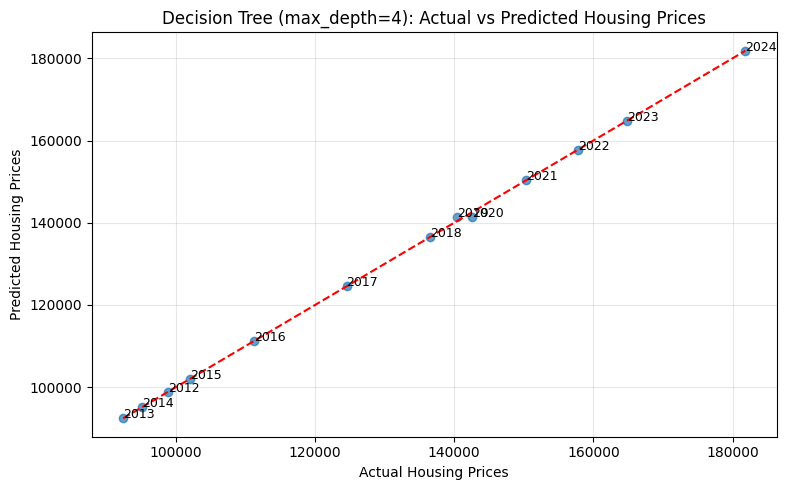

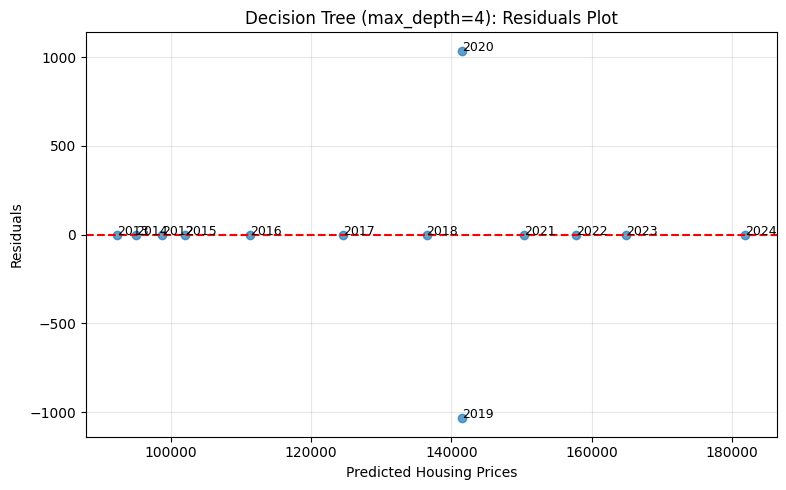

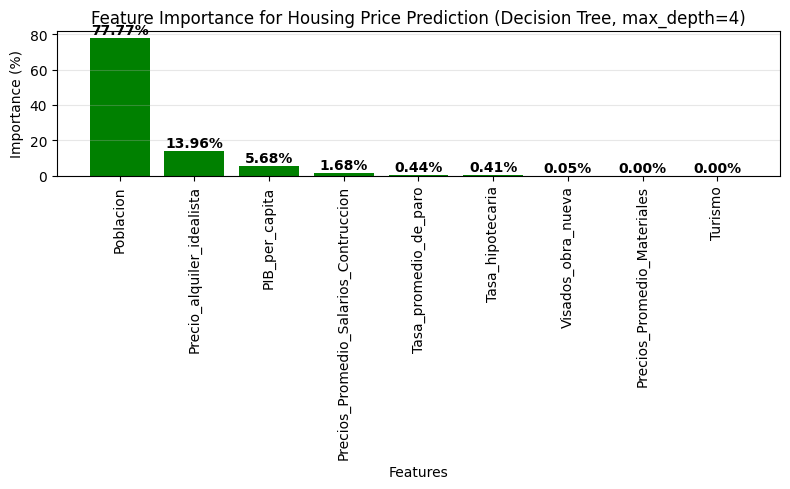

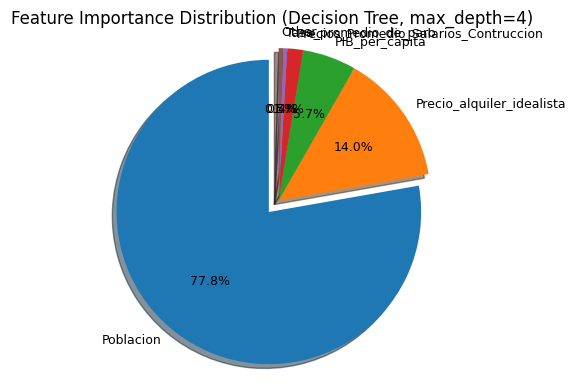

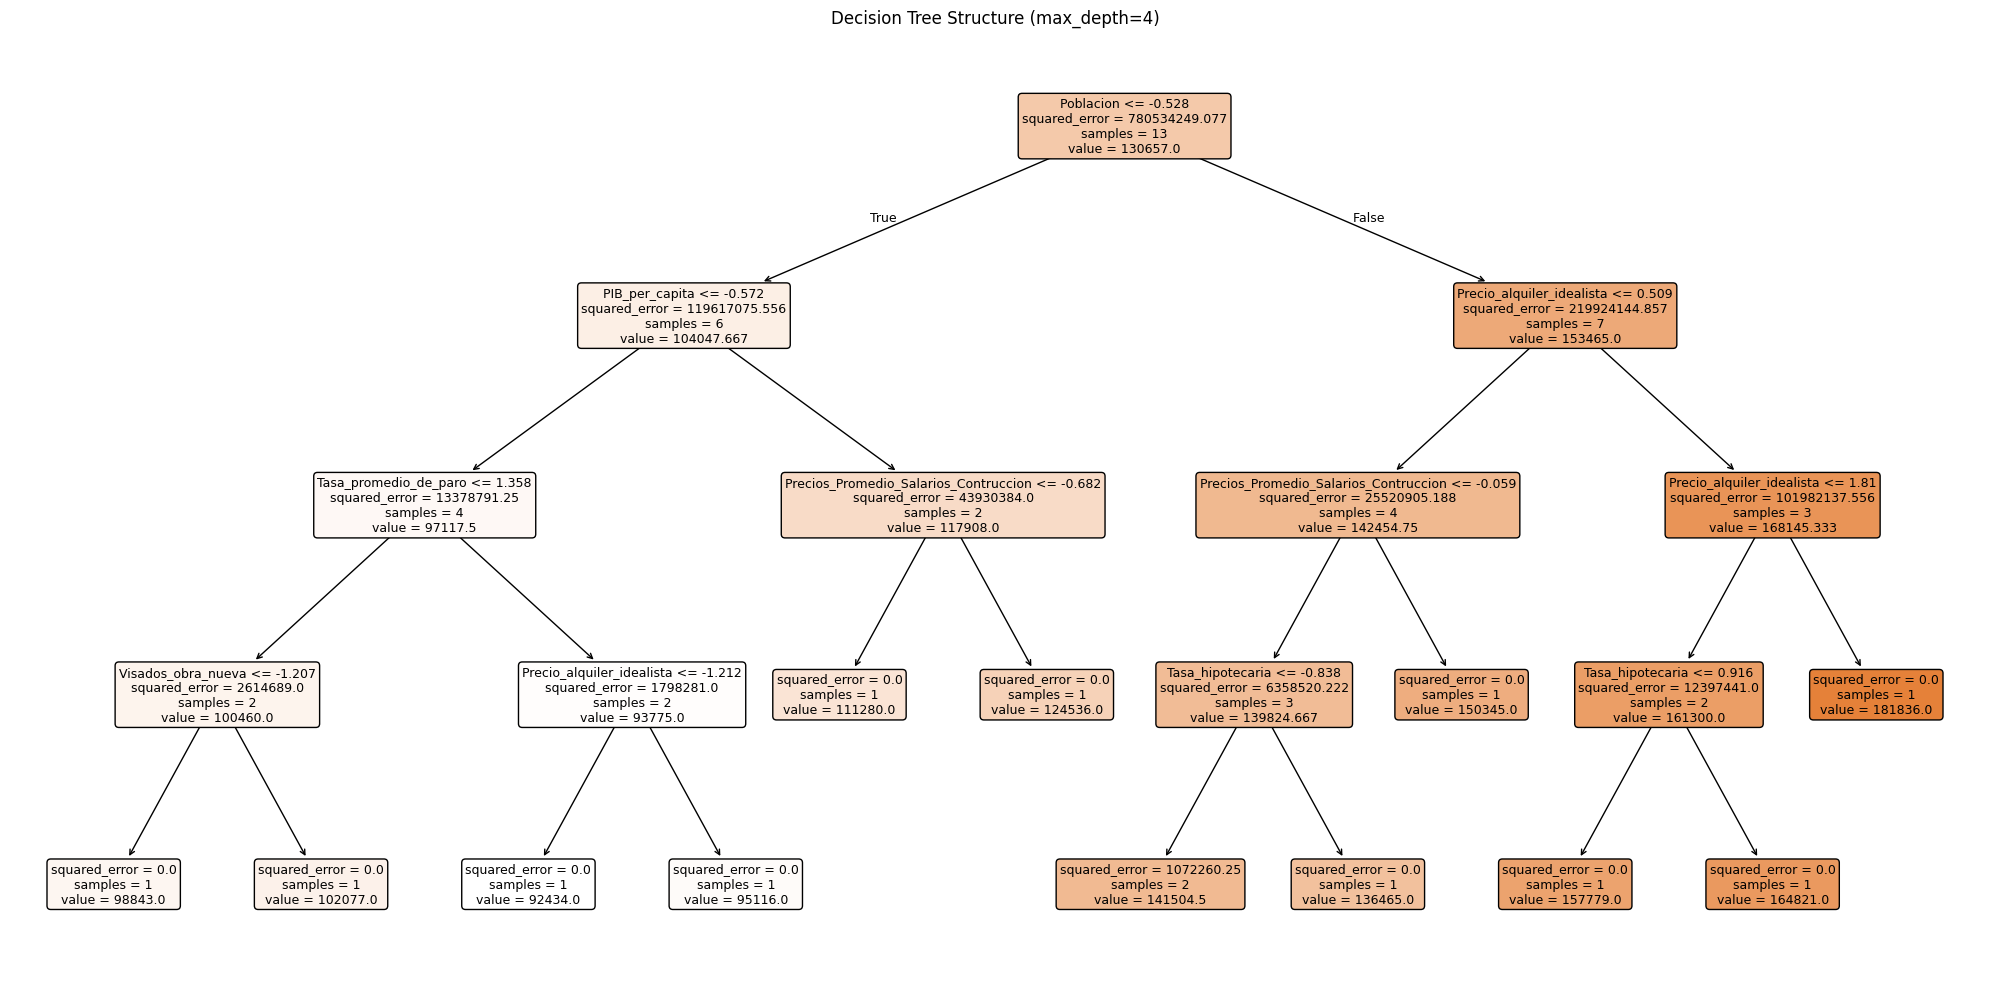

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import math

ruta_archivo = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\datos_regresion_con_turismo_madrid.xlsx'
df = pd.read_excel(ruta_archivo)

X = df.drop(['year', 'Precio_vivienda'], axis=1)
y = df['Precio_vivienda']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3]
}
tree_cv = GridSearchCV(
    DecisionTreeRegressor(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)
tree_cv.fit(X_scaled, y)
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

tree = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
tree.fit(X_scaled, y)

y_pred = tree.predict(X_scaled)

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) * 100  

n = len(y) 
p = X.shape[1] 
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


residual_sum_of_squares = np.sum((y - y_pred) ** 2)
n_leaves = tree.get_n_leaves()
aic = n * np.log(residual_sum_of_squares / n) + 2 * n_leaves
bic = n * np.log(residual_sum_of_squares / n) + np.log(n) * n_leaves

loo = LeaveOneOut()
cv_scores = cross_val_score(
    DecisionTreeRegressor(
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    ), 
    X_scaled, 
    y, 
    cv=loo, 
    scoring='r2'
)
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²', 'Adjusted R²', 'MAPE (%)', 'Mean CV R² (LOOCV)', 'Std CV R² (LOOCV)', 
               'AIC', 'BIC', 'Max Depth', 'Min Samples Split', 'Min Samples Leaf', 'Number of Leaves'],
    'Value': [rmse, mae, r2, adjusted_r2, mape, mean_cv_r2, std_cv_r2, 
             aic, bic, best_params['max_depth'], best_params['min_samples_split'], 
             best_params['min_samples_leaf'], n_leaves],
    'Acceptable Range': ['< 10,000', '< 8,000', '> 0.7', '> 0.6', '< 8%', '> 0.5', 'Lower is better', 
                        'Compare models', 'Compare models', '2-4', '≥ 2', '≥ 1', 'N/A'],
    'Status': [
        'Good' if rmse < 10000 else 'Poor',
        'Good' if mae < 8000 else 'Poor',
        'Good' if r2 > 0.7 else 'Poor',
        'Good' if adjusted_r2 > 0.6 else 'Poor',
        'Good' if mape < 8 else 'Poor',
        'Good' if mean_cv_r2 > 0.5 else 'Poor',
        'N/A',
        'Compare models',
        'Compare models',
        'N/A',
        'N/A',
        'N/A',
        'N/A'
    ]
})

print("\n===== MODEL EVALUATION METRICS =====")
print(metrics_df.to_string(index=False))

importances = tree.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Importance (%)': importances / importances.sum() * 100
})
importance_df = importance_df.sort_values('Importance', ascending=False)

print("\n===== DECISION TREE FEATURE IMPORTANCE =====")
print(importance_df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

print("\n===== DECISION TREE STRUCTURE =====")
tree_text = export_text(tree, feature_names=list(X.columns))
print(tree_text)

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title(f'Decision Tree (max_depth={best_params["max_depth"]}): Actual vs Predicted Housing Prices')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y.iloc[i], y_pred[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Residuals')
plt.title(f'Decision Tree (max_depth={best_params["max_depth"]}): Residuals Plot')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y_pred[i], residuals.iloc[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(
    importance_df['Feature'], 
    importance_df['Importance (%)'], 
    color='green'
)
plt.title(f'Feature Importance for Housing Price Prediction (Decision Tree, max_depth={best_params["max_depth"]})')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(importance_df['Importance (%)']):
    plt.text(
        i, 
        v + 0.5, 
        f"{v:.2f}%", 
        ha='center', 
        va='bottom', 
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))

if len(importance_df) > 5:
    top5_features = importance_df.iloc[:5]
    other_features = importance_df.iloc[5:]
    
    other_importance = other_features['Importance (%)'].sum()
    
    labels = list(top5_features['Feature']) + ['Other']
    sizes = list(top5_features['Importance (%)']) + [other_importance]
    
    explode = [0.1] + [0] * (len(labels) - 1)
else:
    labels = importance_df['Feature']
    sizes = importance_df['Importance (%)']
    explode = [0.1] + [0] * (len(labels) - 1)

plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90,
    textprops={'fontsize': 9}
)
plt.axis('equal')  
plt.title(f'Feature Importance Distribution (Decision Tree, max_depth={best_params["max_depth"]})')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(
    tree, 
    feature_names=list(X.columns),
    filled=True, 
    rounded=True, 
    fontsize=9
)
plt.title(f'Decision Tree Structure (max_depth={best_params["max_depth"]})')
plt.tight_layout()
plt.show()

#### == Comparación de modelos ==

##### ==== Comparación de modelos ====

===== MODEL COMPARISON TABLE =====
                                   RMSE         MAE        R²  Adjusted R²  \
Lasso Regression            1013.161633  843.279394  0.998685     0.994740   
Multiple Linear Regression  1007.443173  817.582944  0.998700     0.994799   
Ridge Regression            1021.861749  853.398369  0.998662     0.994649   
Elastic Net                 1032.312083  866.432725  0.998635     0.994539   
Decision Tree                406.156516  159.307692  0.999789     0.999155   

                            MAPE (%)  
Lasso Regression            0.708700  
Multiple Linear Regression  0.693048  
Ridge Regression            0.710846  
Elastic Net                 0.715777  
Decision Tree               0.112587  

===== MODEL RANKING BY METRIC =====
                            RMSE Rank  MAE Rank  R² Rank  Adjusted R² Rank  \
Decision Tree                     1.0       1.0      1.0               1.0   
Multiple Linear Regression        2.0       2.0      2.0             

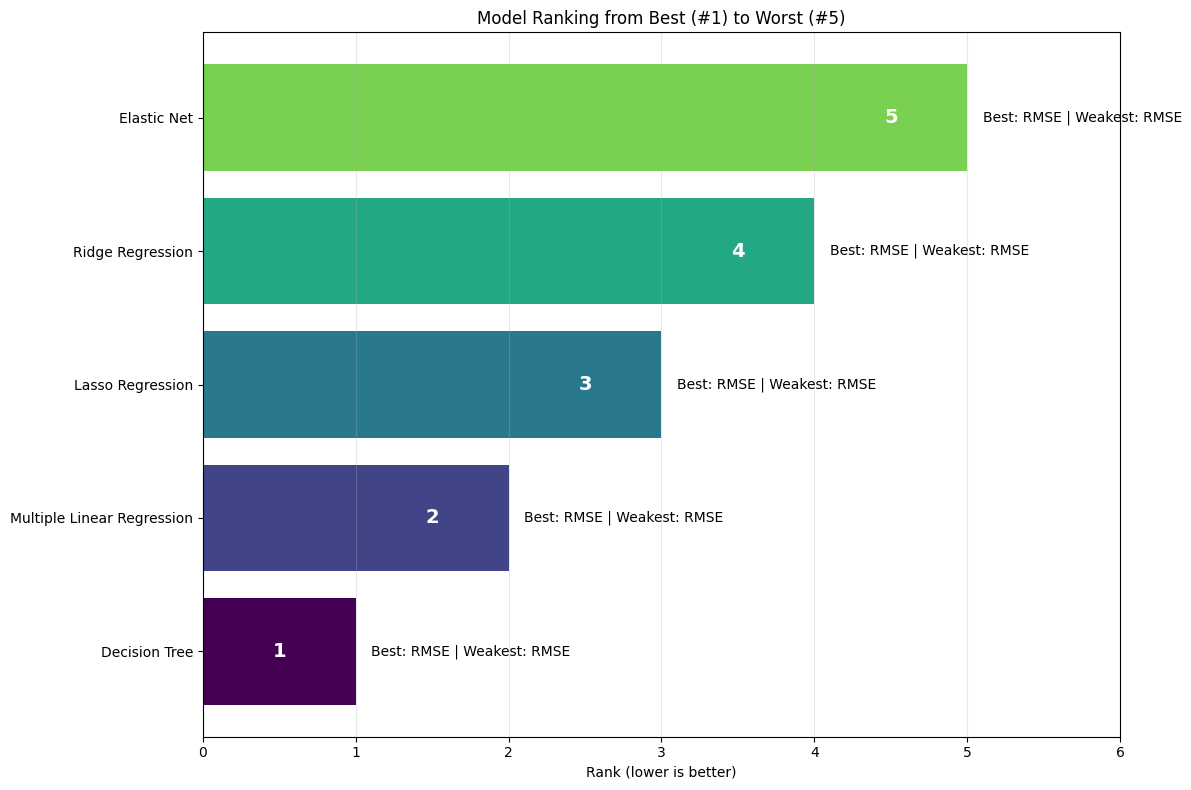

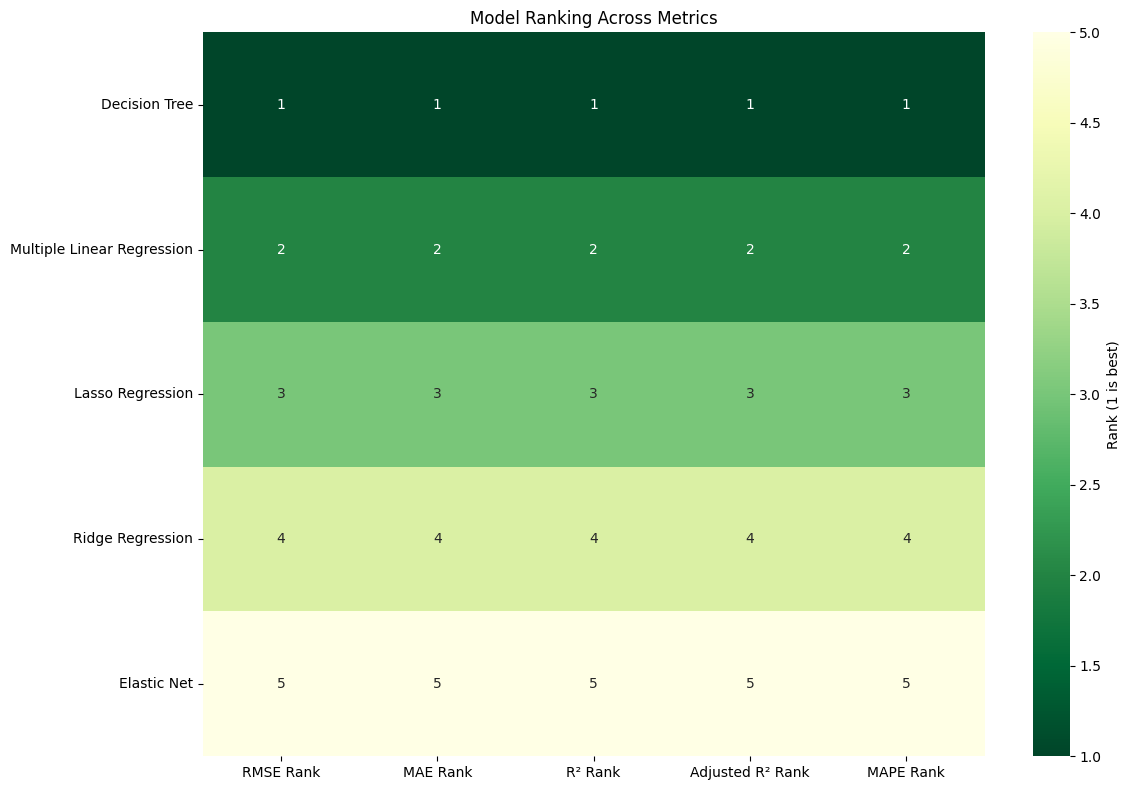

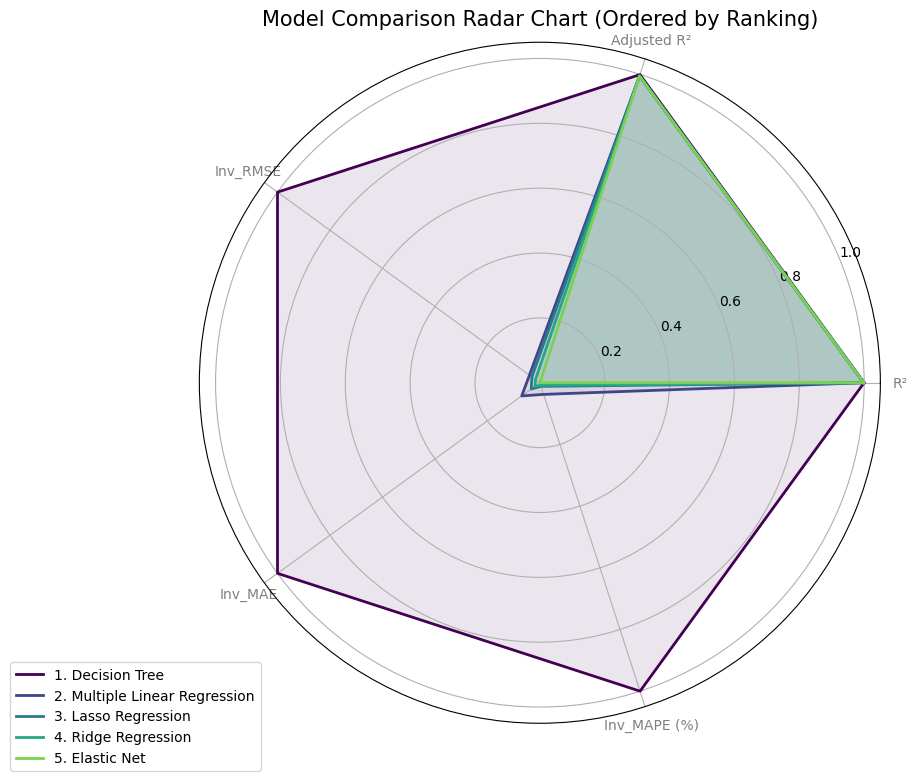


===== SUMMARY AND RECOMMENDATION =====
BEST MODEL: Decision Tree
- Strengths: Best at RMSE
- Limitations: Weakest at RMSE

RUNNER-UP: Multiple Linear Regression
- Strengths: Best at RMSE
- Limitations: Weakest at RMSE

LEAST RECOMMENDED: Elastic Net
- Limitations: Ranks poorly overall, particularly at RMSE

RECOMMENDATION:
Based on comprehensive evaluation across all metrics, Decision Tree is the optimal choice for housing price prediction with your limited dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Lasso Regression', 'Multiple Linear Regression', 'Ridge Regression', 'Elastic Net', 'Decision Tree']

# Extraído de mis modelos anteriors
metrics = {
    'RMSE': [1013.161633, 1007.443173, 1021.861749, 1032.312083, 406.156516],
    'MAE': [843.279394, 817.582944, 853.398369, 866.432725, 159.307692],
    'R²': [0.998685, 0.998700, 0.998662, 0.998635, 0.999789],
    'Adjusted R²': [0.994740, 0.994799, 0.994649, 0.994539, 0.999155],
    'MAPE (%)': [0.708700, 0.693048, 0.710846, 0.715777, 0.112587]
}

comparison_df = pd.DataFrame(metrics, index=models)

def highlight_best(s):
    if s.name in ['RMSE', 'MAE', 'MAPE (%)']:
        is_best = s == s.min()
    else:
        is_best = s == s.max()
    
    return ['background-color: lightgreen' if v else '' for v in is_best]

styled_comparison = comparison_df.style.apply(highlight_best)

print("===== MODEL COMPARISON TABLE =====")
print(comparison_df)

def rank_models(df, metric, higher_better=True):
    if higher_better:
        return df[metric].rank(ascending=False)
    else:
        return df[metric].rank()

rank_df = pd.DataFrame(index=models)
rank_df['RMSE Rank'] = rank_models(comparison_df, 'RMSE', higher_better=False)
rank_df['MAE Rank'] = rank_models(comparison_df, 'MAE', higher_better=False)
rank_df['R² Rank'] = rank_models(comparison_df, 'R²', higher_better=True)
rank_df['Adjusted R² Rank'] = rank_models(comparison_df, 'Adjusted R²', higher_better=True)
rank_df['MAPE Rank'] = rank_models(comparison_df, 'MAPE (%)', higher_better=False)

rank_df['Average Rank'] = rank_df.mean(axis=1)
rank_df = rank_df.sort_values('Average Rank')

print("\n===== MODEL RANKING BY METRIC =====")
print(rank_df)

final_ranking = pd.DataFrame({
    'Rank': range(1, len(models) + 1),
    'Model': rank_df.index,
    'Average Rank Score': rank_df['Average Rank'].values,
    'Best At': [''] * len(models),
    'Weakest At': [''] * len(models)
})

for i, model in enumerate(rank_df.index):
    best_metric = rank_df.loc[model, ['RMSE Rank', 'MAE Rank', 'R² Rank', 'Adjusted R² Rank', 'MAPE Rank']].idxmin()
    best_metric = best_metric.replace(' Rank', '')
    
    worst_metric = rank_df.loc[model, ['RMSE Rank', 'MAE Rank', 'R² Rank', 'Adjusted R² Rank', 'MAPE Rank']].idxmax()
    worst_metric = worst_metric.replace(' Rank', '')
    
    final_ranking.loc[i, 'Best At'] = best_metric
    final_ranking.loc[i, 'Weakest At'] = worst_metric

print("\n===== FINAL MODEL RANKING (BEST TO WORST) =====")
print(final_ranking.to_string(index=False))

plt.figure(figsize=(12, 8))
bars = plt.barh(final_ranking['Model'], final_ranking['Rank'], color=plt.cm.viridis(np.linspace(0, 0.8, len(models))))
plt.xlabel('Rank (lower is better)')
plt.title('Model Ranking from Best (#1) to Worst (#5)')
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, len(models)+1)

for i, bar in enumerate(bars):
    plt.text(bar.get_width() - 0.5, bar.get_y() + bar.get_height()/2, 
             str(final_ranking['Rank'][i]), 
             ha='center', va='center', color='white', fontweight='bold', fontsize=14)

for i, model in enumerate(final_ranking['Model']):
    plt.text(final_ranking['Rank'][i] + 0.1, i, 
             f"Best: {final_ranking['Best At'][i]} | Weakest: {final_ranking['Weakest At'][i]}", 
             va='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(rank_df.iloc[:, :-1], annot=True, cmap='YlGn_r', cbar_kws={'label': 'Rank (1 is best)'})
plt.title('Model Ranking Across Metrics')
plt.tight_layout()
plt.show()

metrics_for_radar = ['R²', 'Adjusted R²']
inverted_metrics = ['RMSE', 'MAE', 'MAPE (%)']

radar_df = comparison_df[metrics_for_radar].copy()

for metric in inverted_metrics:
    min_val = comparison_df[metric].min()
    max_val = comparison_df[metric].max()
    range_val = max_val - min_val
    normalized_inverted = 1 - ((comparison_df[metric] - min_val) / range_val if range_val > 0 else 0)
    radar_df[f'Inv_{metric}'] = normalized_inverted

categories = metrics_for_radar + [f'Inv_{m}' for m in inverted_metrics]
num_models = len(models)
num_vars = len(categories)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += [angles[0]]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=10)

for i, model in enumerate(final_ranking['Model']):
    values = radar_df.loc[model].tolist()
    values += [values[0]]
    ax.plot(angles, values, linewidth=2, linestyle='solid', 
            label=f"{i+1}. {model}", 
            color=plt.cm.viridis(i/len(models)))
    ax.fill(angles, values, alpha=0.1, color=plt.cm.viridis(i/len(models)))

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Model Comparison Radar Chart (Ordered by Ranking)', size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

best_model = final_ranking['Model'].iloc[0]
second_best = final_ranking['Model'].iloc[1]
worst_model = final_ranking['Model'].iloc[-1]

print("\n===== SUMMARY AND RECOMMENDATION =====")
print(f"BEST MODEL: {best_model}")
print(f"- Strengths: Best at {final_ranking['Best At'].iloc[0]}")
print(f"- Limitations: Weakest at {final_ranking['Weakest At'].iloc[0]}")
print(f"\nRUNNER-UP: {second_best}")
print(f"- Strengths: Best at {final_ranking['Best At'].iloc[1]}")
print(f"- Limitations: Weakest at {final_ranking['Weakest At'].iloc[1]}")
print(f"\nLEAST RECOMMENDED: {worst_model}")
print(f"- Limitations: Ranks poorly overall, particularly at {final_ranking['Weakest At'].iloc[-1]}")

print("\nRECOMMENDATION:")
print(f"Based on comprehensive evaluation across all metrics, {best_model} is the optimal choice for housing price prediction with your limited dataset.")

##### ==== Feature importance ====

===== FEATURE IMPORTANCE COMPARISON ACROSS MODELS =====
                                       Lasso Regression  \
Poblacion                                         20.71   
Tasa_promedio_de_paro                             15.55   
Precio_alquiler_idealista                          8.55   
PIB_per_capita                                    17.74   
Visados_obra_nueva                                16.71   
Turismo                                           11.36   
Tasa_hipotecaria                                   4.61   
Precios_Promedio_Materiales                        0.12   
Precios_Promedio_Salarios_Contruccion              0.00   

                                       Multiple Linear Regression  \
Poblacion                                                   16.33   
Tasa_promedio_de_paro                                       26.28   
Precio_alquiler_idealista                                   30.23   
PIB_per_capita                                              12.40   
Visados_

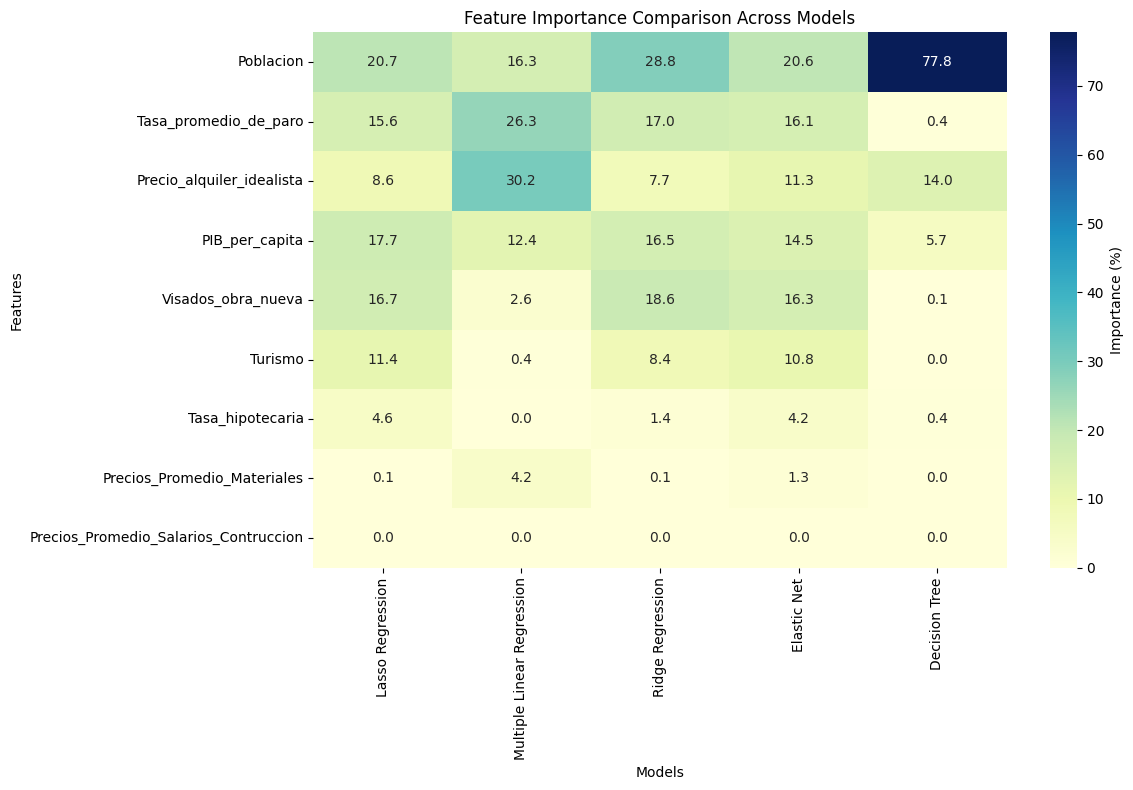

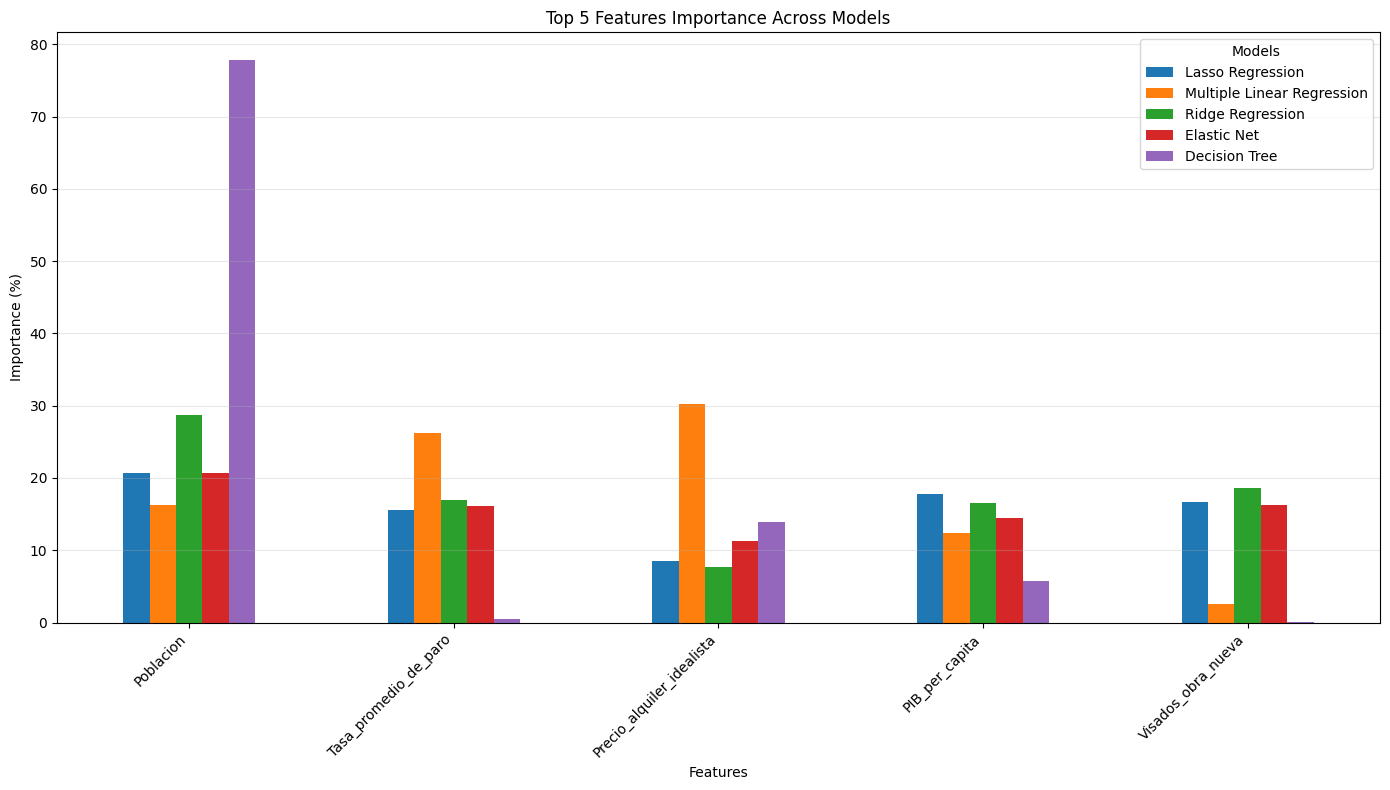

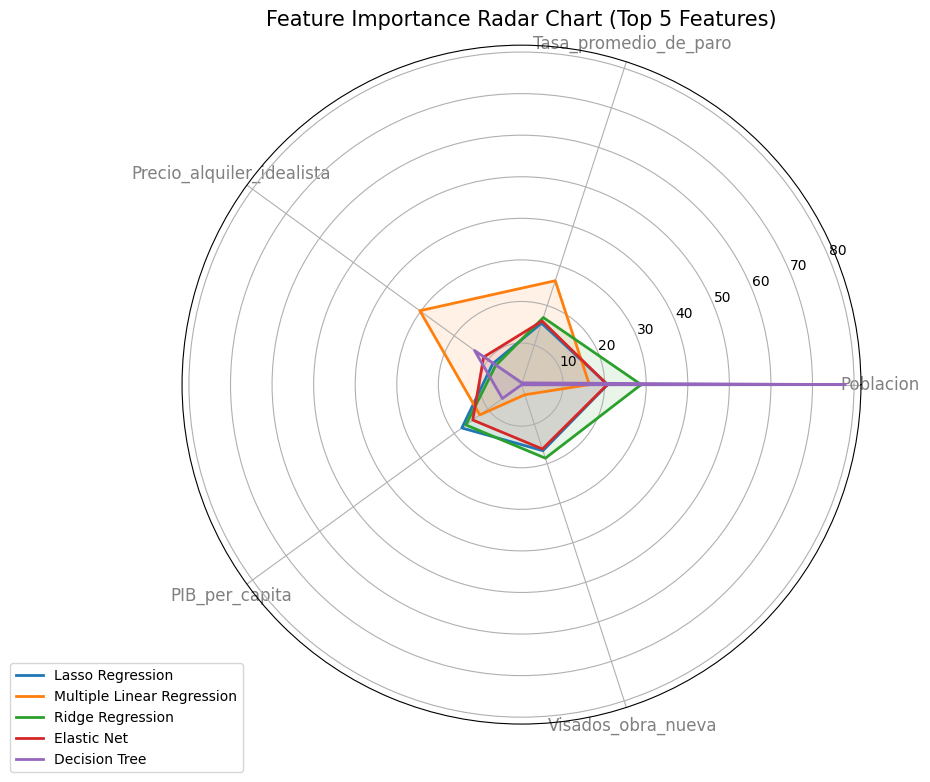


===== FEATURE CONSENSUS ANALYSIS =====
                                       Average Importance (%)  \
PIB_per_capita                                          13.37   
Tasa_promedio_de_paro                                   15.06   
Precio_alquiler_idealista                               14.34   
Poblacion                                               32.85   
Visados_obra_nueva                                      10.84   
Turismo                                                  6.21   
Tasa_hipotecaria                                         2.12   
Precios_Promedio_Materiales                              1.14   
Precios_Promedio_Salarios_Contruccion                    0.00   

                                       Std Dev Across Models  Consensus Score  
PIB_per_capita                                          4.75             2.34  
Tasa_promedio_de_paro                                   9.28             1.44  
Precio_alquiler_idealista                               9.21         

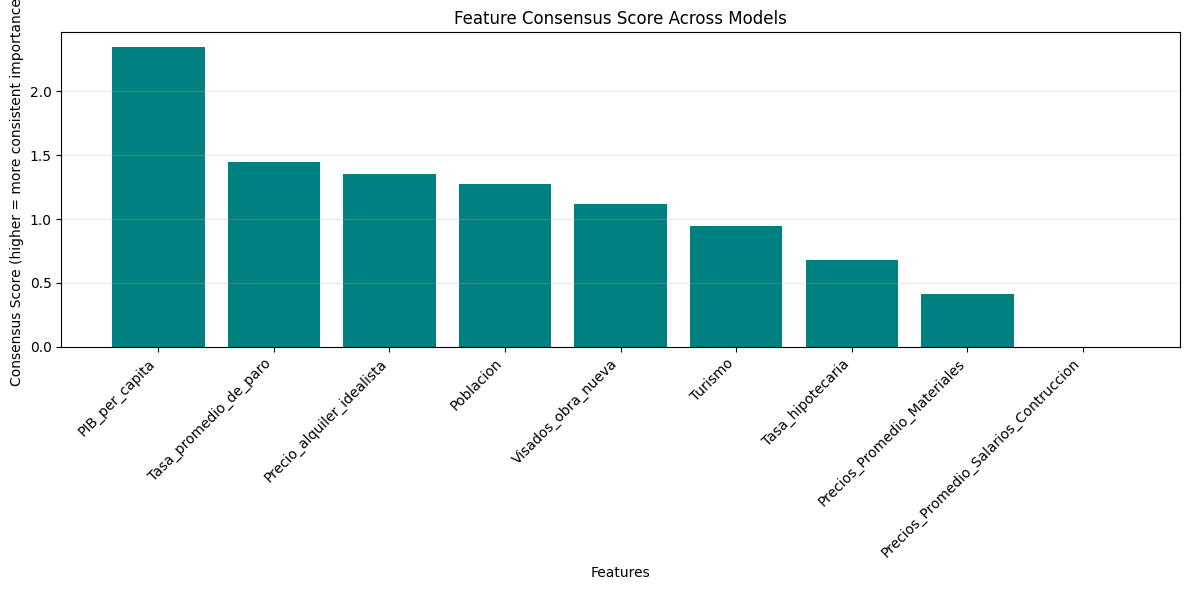


===== FEATURE SELECTION RECOMMENDATION =====
Based on importance and consensus across models, the recommended features are:
1. PIB_per_capita - Consistent high importance across all models
2. Tasa_promedio_de_paro - Consistent high importance across all models
3. Precio_alquiler_idealista - Consistent high importance across all models

Features with low importance that could potentially be removed:
- Tasa_hipotecaria (Avg. Importance: 2.1%)
- Precios_Promedio_Materiales (Avg. Importance: 1.1%)
- Precios_Promedio_Salarios_Contruccion (Avg. Importance: 0.0%)

===== MODEL DISAGREEMENT ANALYSIS =====
Features with high disagreement between models:
- Tasa_promedio_de_paro: May indicate complex or non-linear relationships
- Precio_alquiler_idealista: May indicate complex or non-linear relationships
- Poblacion: May indicate complex or non-linear relationships
- Visados_obra_nueva: May indicate complex or non-linear relationships

===== LINEAR VS TREE-BASED IMPORTANCE COMPARISON =====
      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Lasso Regression', 'Multiple Linear Regression', 'Ridge Regression', 'Elastic Net', 'Decision Tree']


features = [
    'Tasa_hipotecaria',
    'PIB_per_capita',
    'Precios_Promedio_Materiales',
    'Precios_Promedio_Salarios_Contruccion',
    'Visados_obra_nueva',
    'Tasa_promedio_de_paro',
    'Poblacion',
    'Precio_alquiler_idealista',
    'Turismo',
]


feature_importance = {
    'Lasso Regression': {
        'Precio_alquiler_idealista': 8.55,
        'PIB_per_capita': 17.74,
        'Poblacion': 20.71,
        'Visados_obra_nueva': 16.71,
        'Tasa_hipotecaria': 4.61,  
        'Precios_Promedio_Materiales': 0.12,  
        'Precios_Promedio_Salarios_Construccion': 4.65,  
        'Tasa_promedio_de_paro': 15.55,  
        'Turismo': 11.36,
    },
    'Multiple Linear Regression': {
        'Precio_alquiler_idealista': 30.23,
        'PIB_per_capita': 12.40,
        'Poblacion': 16.33,
        'Visados_obra_nueva': 2.57,
        'Tasa_hipotecaria': 0.01,  
        'Precios_Promedio_Materiales': 4.20,  
        'Precios_Promedio_Salarios_Construccion': 7.57,  
        'Tasa_promedio_de_paro': 26.28,  
        'Turismo': 0.41,
    },
    'Ridge Regression': {
        'Precio_alquiler_idealista': 7.72,
        'PIB_per_capita': 16.52,
        'Poblacion': 28.78,
        'Visados_obra_nueva': 18.61,
        'Tasa_hipotecaria': 1.36,  
        'Precios_Promedio_Materiales': 0.05,  
        'Precios_Promedio_Salarios_Construccion': 1.56,  
        'Tasa_promedio_de_paro': 16.97,  
        'Turismo': 8.44,
    },
    'Elastic Net': {
        'Precio_alquiler_idealista': 11.26,
        'PIB_per_capita': 14.49,
        'Poblacion': 20.64,
        'Visados_obra_nueva': 16.28,
        'Tasa_hipotecaria': 4.22,  
        'Precios_Promedio_Materiales': 1.31,  
        'Precios_Promedio_Salarios_Construccion': 4.89,  
        'Tasa_promedio_de_paro': 16.08,  
        'Turismo': 10.83,
    },
    'Decision Tree': {
        'Precio_alquiler_idealista': 13.96,
        'PIB_per_capita': 5.68,
        'Poblacion': 77.77,
        'Visados_obra_nueva': 0.05,
        'Tasa_hipotecaria': 0.41,  
        'Precios_Promedio_Materiales': 0.00,  
        'Precios_Promedio_Salarios_Construccion': 1.68,  
        'Tasa_promedio_de_paro': 0.44,  
        'Turismo': 0.00,
    }
}

importance_df = pd.DataFrame(index=features)

for model in models:
    importance_df[model] = importance_df.index.map(lambda x: feature_importance[model].get(x, 0))

importance_df = importance_df.fillna(0)

importance_df['Average'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values('Average', ascending=False)
importance_df = importance_df.drop('Average', axis=1)

print("===== FEATURE IMPORTANCE COMPARISON ACROSS MODELS =====")
print(importance_df.round(2))

plt.figure(figsize=(12, 8))
sns.heatmap(importance_df, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Importance (%)'})
plt.title('Feature Importance Comparison Across Models')
plt.xlabel('Models')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

top_features = importance_df.index[:5].tolist()
top_features_df = importance_df.loc[top_features]

top_features_df.plot(kind='bar', figsize=(14, 8))
plt.title('Top 5 Features Importance Across Models')
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Models')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

models_for_radar = models

categories = top_features
num_models = len(models_for_radar)
num_vars = len(categories)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += [angles[0]]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)

for i, model in enumerate(models_for_radar):
    values = top_features_df[model].tolist()
    values += [values[0]]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Feature Importance Radar Chart (Top 5 Features)', size=15)
plt.grid(True)
plt.tight_layout()
plt.show()


def calculate_consensus(df):
    normalized_df = df.copy()
    for column in normalized_df.columns:
        if normalized_df[column].sum() > 0:  
            normalized_df[column] = normalized_df[column] / normalized_df[column].sum()
    
    std_devs = normalized_df.std(axis=1)
    
    avg_importance = normalized_df.mean(axis=1)
    
    consensus_score = avg_importance / (std_devs + 0.01)  
    
    return consensus_score

consensus_scores = calculate_consensus(importance_df)
consensus_df = pd.DataFrame({
    'Average Importance (%)': importance_df.mean(axis=1),
    'Std Dev Across Models': importance_df.std(axis=1),
    'Consensus Score': consensus_scores
})
consensus_df = consensus_df.sort_values('Consensus Score', ascending=False)

print("\n===== FEATURE CONSENSUS ANALYSIS =====")
print(consensus_df.round(2))

plt.figure(figsize=(12, 6))
plt.bar(consensus_df.index, consensus_df['Consensus Score'], color='teal')
plt.title('Feature Consensus Score Across Models')
plt.xlabel('Features')
plt.ylabel('Consensus Score (higher = more consistent importance)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n===== FEATURE SELECTION RECOMMENDATION =====")
print("Based on importance and consensus across models, the recommended features are:")
for i, feature in enumerate(consensus_df.index[:3]):
    print(f"{i+1}. {feature} - Consistent high importance across all models")

print("\nFeatures with low importance that could potentially be removed:")
for feature in consensus_df.index[-3:]:
    importance = consensus_df.loc[feature, 'Average Importance (%)']
    if importance < 5:  
        print(f"- {feature} (Avg. Importance: {importance:.1f}%)")

print("\n===== MODEL DISAGREEMENT ANALYSIS =====")
high_disagreement = consensus_df[consensus_df['Std Dev Across Models'] > consensus_df['Std Dev Across Models'].median()]
if not high_disagreement.empty:
    print("Features with high disagreement between models:")
    for feature in high_disagreement.index:
        print(f"- {feature}: May indicate complex or non-linear relationships")
else:
    print("Models largely agree on feature importance rankings.")

if 'Decision Tree' in models:
    linear_models = [m for m in models if m != 'Decision Tree']
    linear_avg = importance_df[linear_models].mean(axis=1)
    tree_importance = importance_df['Decision Tree']
    
    comparison = pd.DataFrame({
        'Linear Models Avg': linear_avg,
        'Decision Tree': tree_importance,
        'Difference': tree_importance - linear_avg
    })
    comparison = comparison.sort_values('Difference', ascending=False)
    
    print("\n===== LINEAR VS TREE-BASED IMPORTANCE COMPARISON =====")
    print(comparison.round(2))
    
    print("\nFeatures more important in Decision Tree than in Linear Models:")
    for feature in comparison[comparison['Difference'] > 2].index:
        print(f"- {feature}: May indicate non-linear relationship")
    
    print("\nFeatures more important in Linear Models than in Decision Tree:")
    for feature in comparison[comparison['Difference'] < -2].index:
        print(f"- {feature}: May have more linear relationship with target")
        

### Elastic Search, correciones Pablo

Multicolinealidad 

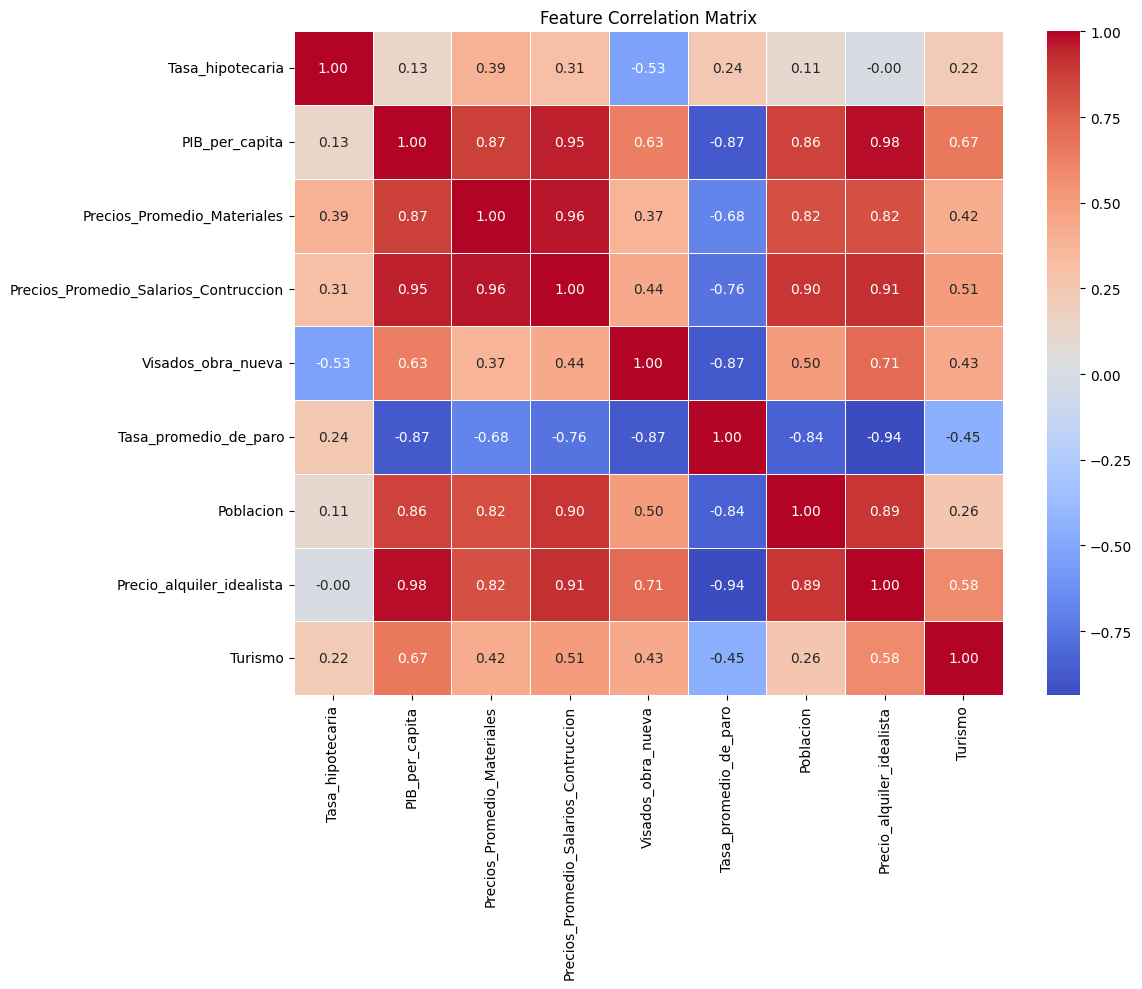


===== MULTICOLLINEARITY ANALYSIS =====
Variance Inflation Factors (VIF):
                             Variable           VIF
Precios_Promedio_Salarios_Contruccion 694681.404538
                            Poblacion 156925.707941
          Precios_Promedio_Materiales  49686.595041
            Precio_alquiler_idealista  26595.373383
                       PIB_per_capita   7277.813781
                Tasa_promedio_de_paro   5204.748958
                   Visados_obra_nueva    374.456209
                              Turismo    175.830402
                     Tasa_hipotecaria     41.358541

VIF > 10 indicates problematic multicollinearity
VIF > 5 indicates moderate multicollinearity

Highly Correlated Feature Pairs (|r| > 0.7):
PIB_per_capita <-> Precio_alquiler_idealista: 0.9781
Precios_Promedio_Materiales <-> Precios_Promedio_Salarios_Contruccion: 0.9639
PIB_per_capita <-> Precios_Promedio_Salarios_Contruccion: 0.9476
Tasa_promedio_de_paro <-> Precio_alquiler_idealista: -0.9371
Precios_

In [ ]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_df = calculate_vif(X)
print("\n===== MULTICOLLINEARITY ANALYSIS =====")
print("Variance Inflation Factors (VIF):")
print(vif_df.to_string(index=False))
print("\nVIF > 10 indicates problematic multicollinearity")
print("VIF > 5 indicates moderate multicollinearity")

high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > (0.7):  
            high_correlation_pairs.append(
                (correlation_matrix.columns[i], 
                 correlation_matrix.columns[j], 
                 correlation_matrix.iloc[i, j])
            )

high_correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if high_correlation_pairs:
    print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.4f}")
else:
    print("\nNo highly correlated feature pairs found (|r| > 0.7)") 


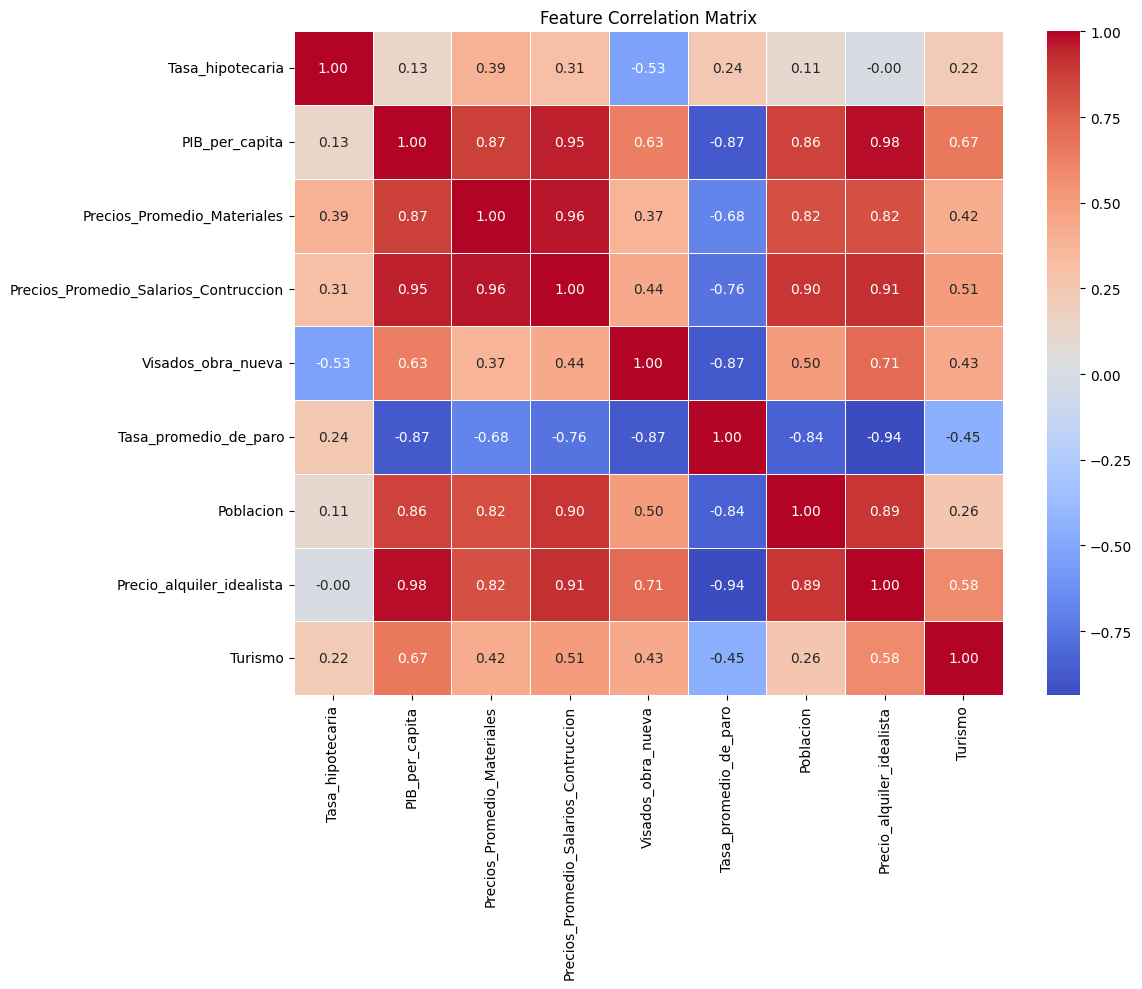


===== MULTICOLLINEARITY ANALYSIS =====
Variance Inflation Factors (VIF):
                             Variable           VIF
Precios_Promedio_Salarios_Contruccion 694681.404538
                            Poblacion 156925.707941
          Precios_Promedio_Materiales  49686.595041
            Precio_alquiler_idealista  26595.373383
                       PIB_per_capita   7277.813781
                Tasa_promedio_de_paro   5204.748958
                   Visados_obra_nueva    374.456209
                              Turismo    175.830402
                     Tasa_hipotecaria     41.358541

VIF > 10 indicates problematic multicollinearity
VIF > 5 indicates moderate multicollinearity

Highly Correlated Feature Pairs (|r| > 0.7):
PIB_per_capita <-> Precio_alquiler_idealista: 0.9781
Precios_Promedio_Materiales <-> Precios_Promedio_Salarios_Contruccion: 0.9639
PIB_per_capita <-> Precios_Promedio_Salarios_Contruccion: 0.9476
Tasa_promedio_de_paro <-> Precio_alquiler_idealista: -0.9371
Precios_

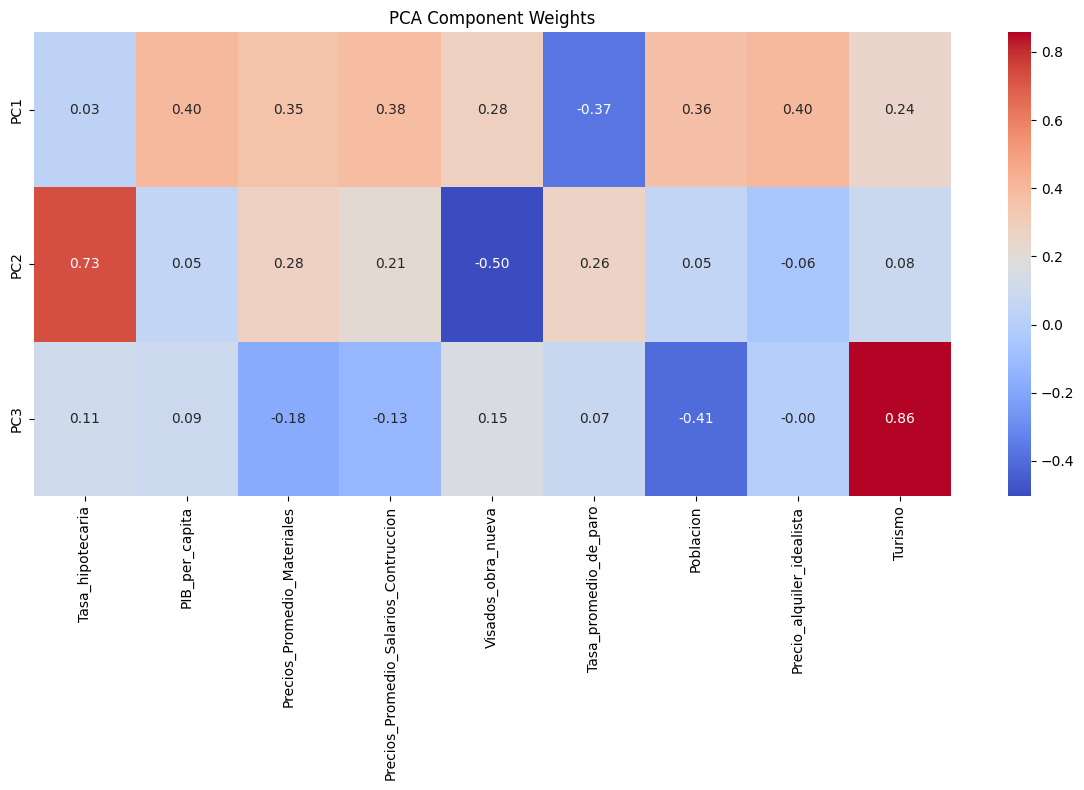


===== REDUCED FEATURE SET VIF =====
                 Variable       VIF
Precio_alquiler_idealista 55.396807
       Visados_obra_nueva 49.387533
                  Turismo 15.822303
         Tasa_hipotecaria  5.123418


c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.087e+06, tolerance: 9.662e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+06, tolerance: 7.693e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Best alpha value: 0.046415888336127774
Best L1 ratio: 0.9

===== MODEL EVALUATION METRICS =====
            Metric       Value Acceptable Range         Status
              RMSE 1032.312083         < 10,000           Good
               MAE  866.432725          < 8,000           Good
                R²    0.998635            > 0.7           Good
       Adjusted R²    0.994539            > 0.6           Good
          MAPE (%)    0.715777             < 8%           Good
Mean CV R² (LOOCV)         NaN            > 0.5           Poor
 Std CV R² (LOOCV)         NaN  Lower is better            N/A
               AIC  200.428464   Compare models Compare models
               BIC  206.077958   Compare models Compare models
             Alpha    0.046416              N/A            N/A
          L1 Ratio    0.900000              N/A            N/A
 Features Selected    9.000000              N/A            N/A

===== ELASTIC NET SELECTED FEATURES =====
Number of features selected: 9 out of 9
  

c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\gmont\OneDrive\Documentos\TFM\venv\Lib\site-packages\sklearn\metrics\_regression.py:126

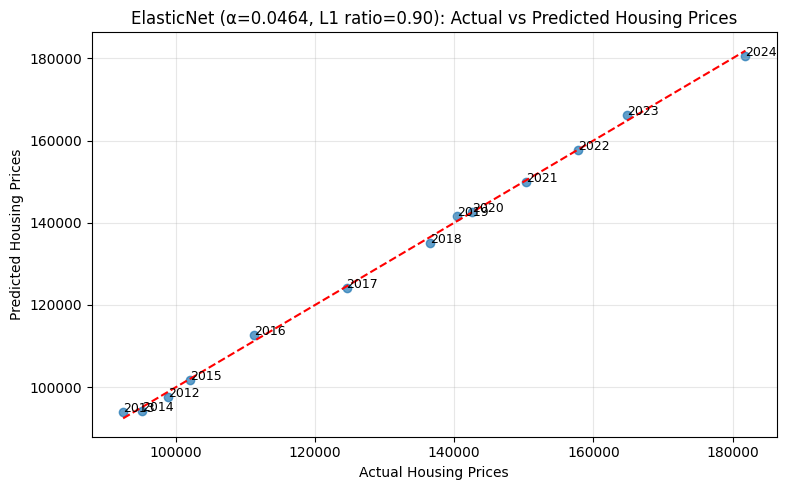

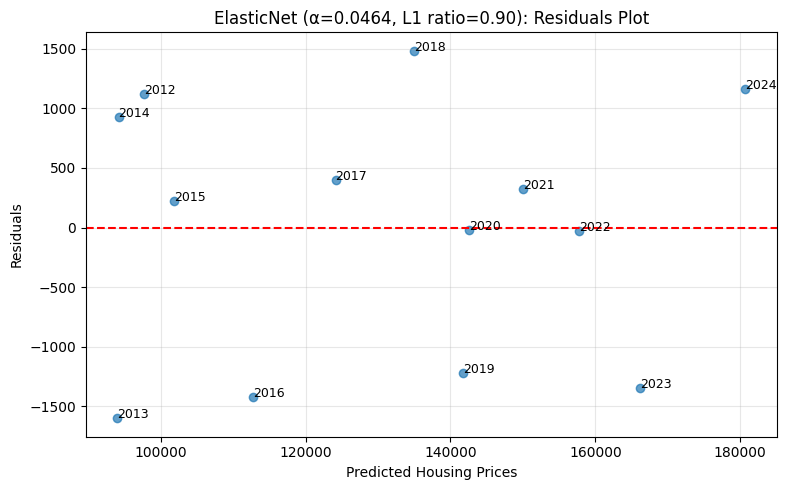

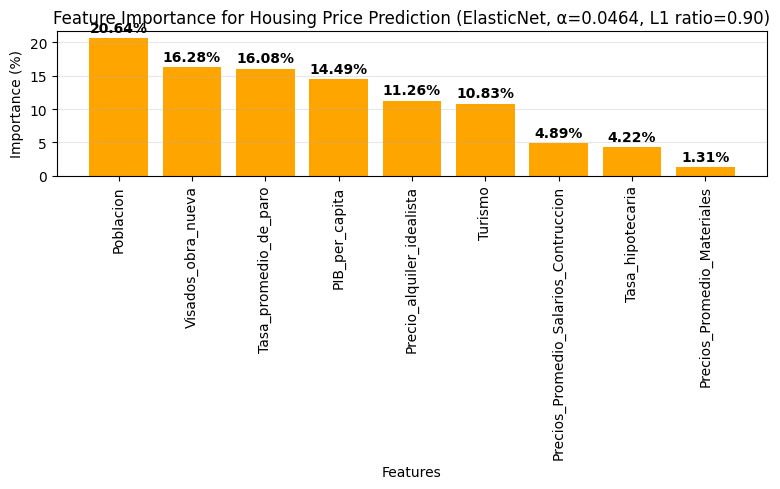

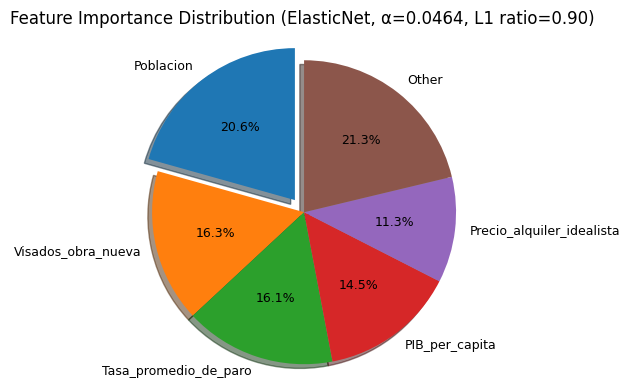


===== MODEL COMPARISON SUMMARY =====
Original ElasticNet: R² = 0.9986, RMSE = 1032.31
PCA-based ElasticNet: R² = 0.9919, RMSE = 2511.03
Reduced Feature ElasticNet: R² = 0.9894, RMSE = 2873.60

Model results saved to: C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\model_results.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import LeaveOneOut, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

ruta_archivo = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\datos_regresion_con_turismo_madrid.xlsx'
df = pd.read_excel(ruta_archivo)

X = df.drop(['year', 'Precio_vivienda'], axis=1)
y = df['Precio_vivienda']

scaler_original = StandardScaler()
X_scaled = scaler_original.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

vif_df = calculate_vif(X)
print("\n===== MULTICOLLINEARITY ANALYSIS =====")
print("Variance Inflation Factors (VIF):")
print(vif_df.to_string(index=False))
print("\nVIF > 10 indicates problematic multicollinearity")
print("VIF > 5 indicates moderate multicollinearity")

high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > (0.7):  
            high_correlation_pairs.append(
                (correlation_matrix.columns[i], 
                 correlation_matrix.columns[j], 
                 correlation_matrix.iloc[i, j])
            )

high_correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if high_correlation_pairs:
    print("\nHighly Correlated Feature Pairs (|r| > 0.7):")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.4f}")
else:
    print("\nNo highly correlated feature pairs found (|r| > 0.7)")

pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

print("\n===== PCA ANALYSIS =====")
print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

plt.figure(figsize=(12, 8))
component_weights = pd.DataFrame(
    pca.components_, 
    columns=X.columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)
sns.heatmap(component_weights, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Component Weights')
plt.tight_layout()
plt.show()

features_to_keep = ['Precio_alquiler_idealista', 'Visados_obra_nueva', 
                   'Tasa_hipotecaria', 'Turismo']

X_reduced = X[features_to_keep]
scaler_reduced = StandardScaler()
X_reduced_scaled = scaler_reduced.fit_transform(X_reduced)

vif_reduced = calculate_vif(X_reduced)
print("\n===== REDUCED FEATURE SET VIF =====")
print(vif_reduced.to_string(index=False))


param_grid = {
    'alpha': np.logspace(-4, 2, 10),
    'l1_ratio': np.linspace(0.1, 0.9, 9) 
}
elastic_cv = GridSearchCV(
    ElasticNet(random_state=42, max_iter=10000), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)
elastic_cv.fit(X_scaled, y)
best_alpha = elastic_cv.best_params_['alpha']
best_l1_ratio = elastic_cv.best_params_['l1_ratio']
print(f"Best alpha value: {best_alpha}")
print(f"Best L1 ratio: {best_l1_ratio}")

elastic = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42, max_iter=10000)
elastic.fit(X_scaled, y)

y_pred = elastic.predict(X_scaled)

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) * 100  

n = len(y)  
p = X.shape[1]  
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

residual_sum_of_squares = np.sum((y - y_pred) ** 2)
non_zero_coef = np.sum(elastic.coef_ != 0)
aic = n * np.log(residual_sum_of_squares / n) + 2 * (non_zero_coef + 1)  
bic = n * np.log(residual_sum_of_squares / n) + np.log(n) * (non_zero_coef + 1)

loo = LeaveOneOut()
cv_scores = cross_val_score(
    ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42, max_iter=10000), 
    X_scaled, 
    y, 
    cv=loo, 
    scoring='r2'
)
mean_cv_r2 = np.mean(cv_scores)
std_cv_r2 = np.std(cv_scores)

metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²', 'Adjusted R²', 'MAPE (%)', 'Mean CV R² (LOOCV)', 'Std CV R² (LOOCV)', 
               'AIC', 'BIC', 'Alpha', 'L1 Ratio', 'Features Selected'],
    'Value': [rmse, mae, r2, adjusted_r2, mape, mean_cv_r2, std_cv_r2, 
             aic, bic, best_alpha, best_l1_ratio, non_zero_coef],
    'Acceptable Range': ['< 10,000', '< 8,000', '> 0.7', '> 0.6', '< 8%', '> 0.5', 'Lower is better', 
                        'Compare models', 'Compare models', 'N/A', 'N/A', 'N/A'],
    'Status': [
        'Good' if rmse < 10000 else 'Poor',
        'Good' if mae < 8000 else 'Poor',
        'Good' if r2 > 0.7 else 'Poor',
        'Good' if adjusted_r2 > 0.6 else 'Poor',
        'Good' if mape < 8 else 'Poor',
        'Good' if mean_cv_r2 > 0.5 else 'Poor',
        'N/A',
        'Compare models',
        'Compare models',
        'N/A',
        'N/A',
        'N/A'
    ]
})

print("\n===== MODEL EVALUATION METRICS =====")
print(metrics_df.to_string(index=False))

coefficients = elastic.coef_
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Value': np.abs(coefficients)
})

non_zero_coef_df = coef_df[coef_df['Coefficient'] != 0]
non_zero_coef_df = non_zero_coef_df.sort_values('Absolute Value', ascending=False)

total_abs_coef = non_zero_coef_df['Absolute Value'].sum()
non_zero_coef_df['Importance (%)'] = non_zero_coef_df['Absolute Value'] / total_abs_coef * 100

print("\n===== ELASTIC NET SELECTED FEATURES =====")
print(f"Number of features selected: {len(non_zero_coef_df)} out of {len(feature_names)}")
print(non_zero_coef_df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))

importance_table = non_zero_coef_df[['Feature', 'Importance (%)']]
importance_table['Importance (%)'] = importance_table['Importance (%)'].round(2)
importance_table = importance_table.sort_values('Importance (%)', ascending=False)

print("\n===== FEATURE IMPORTANCE TABLE =====")
print(importance_table.to_string(index=False))

X_with_const = sm.add_constant(X_scaled)
ols_model = sm.OLS(y, X_with_const).fit()

features_selected = non_zero_coef_df['Feature'].tolist()
ols_coef = ols_model.params[1:] 
feature_idx = {name: i for i, name in enumerate(feature_names)}

coef_comparison = pd.DataFrame({
    'Feature': features_selected,
    'ElasticNet Coefficient': [elastic.coef_[feature_idx[f]] for f in features_selected],
    'OLS Coefficient': [ols_coef[feature_idx[f]] for f in features_selected],
    'Difference': [elastic.coef_[feature_idx[f]] - ols_coef[feature_idx[f]] for f in features_selected],
    'Shrinkage (%)': [(1 - np.abs(elastic.coef_[feature_idx[f]])/np.abs(ols_coef[feature_idx[f]])) * 100 for f in features_selected]
})
coef_comparison = coef_comparison.sort_values('Shrinkage (%)', ascending=False)

print("\n===== COEFFICIENT SHRINKAGE COMPARISON (SELECTED FEATURES) =====")
print(coef_comparison.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else x))


intercept = elastic.intercept_
coefficients = elastic.coef_
feature_names = X.columns

equation = f"Housing Price = {intercept:.4f}"
for i, feature in enumerate(feature_names):
    if coefficients[i] != 0:  
        equation += f" + ({coefficients[i]:.6f} × {feature})"


equation_unscaled = f"Housing Price = {intercept:.4f}"

intercept_adjustment = 0
for i, feature in enumerate(feature_names):
    if coefficients[i] != 0:  
        unscaled_coef = coefficients[i] / scaler_original.scale_[i]
        equation_unscaled += f" + ({unscaled_coef:.6f} × {feature})"
        intercept_adjustment += coefficients[i] * scaler_original.mean_[i] / scaler_original.scale_[i]

final_intercept = intercept - intercept_adjustment
equation_unscaled = f"Housing Price = {final_intercept:.4f}" + equation_unscaled[equation_unscaled.find('+'):]

print("\n===== ELASTICNET REGRESSION EQUATION =====")
print("Equation with standardized features:")
print(equation)
print("\nEquation with original features (for Power BI):")
print(equation_unscaled)

powerbi_coef = pd.DataFrame({
    'Feature': ['Intercept'] + [feature_names[i] for i in range(len(feature_names)) if coefficients[i] != 0],
    'Coefficient': [final_intercept] + 
                  [coefficients[i] / scaler_original.scale_[i] for i in range(len(feature_names)) if coefficients[i] != 0]
})
print("\n===== COEFFICIENTS FOR POWER BI =====")
print(powerbi_coef.to_string(index=False))

importance_matrix = pd.DataFrame({
    'Feature': feature_names,
    'Scaled_Coefficient': coefficients,
    'Unscaled_Coefficient': [coefficients[i] / scaler_original.scale_[i] if coefficients[i] != 0 else 0 
                            for i in range(len(feature_names))],
    'Absolute_Importance': np.abs(coefficients),
    'Relative_Importance(%)': [np.abs(coefficients[i]) / np.sum(np.abs(coefficients)) * 100 if np.sum(np.abs(coefficients)) > 0 else 0 
                              for i in range(len(feature_names))]
})
importance_matrix = importance_matrix[importance_matrix['Scaled_Coefficient'] != 0]
importance_matrix = importance_matrix.sort_values('Absolute_Importance', ascending=False)

print("\n===== FEATURE IMPORTANCE MATRIX =====")
print(importance_matrix.to_string(index=False, float_format=lambda x: f"{x:.6f}" if isinstance(x, float) else x))

elastic_pca = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=42, max_iter=10000)
elastic_pca.fit(X_pca, y)

y_pred_pca = elastic_pca.predict(X_pca)

rmse_pca = np.sqrt(mean_squared_error(y, y_pred_pca))
r2_pca = r2_score(y, y_pred_pca)

print(f"\n===== PCA-BASED ELASTICNET MODEL PERFORMANCE =====")
print(f"RMSE: {rmse_pca:.2f}")
print(f"R²: {r2_pca:.4f}")

pca_intercept = elastic_pca.intercept_
pca_coefficients = elastic_pca.coef_

pca_equation = f"Housing Price = {pca_intercept:.4f}"
for i in range(len(pca_coefficients)):
    if pca_coefficients[i] != 0:  
        pca_equation += f" + ({pca_coefficients[i]:.6f} × PC{i+1})"

pc_equations = []
for i in range(pca.n_components_):
    pc_eq = f"PC{i+1} = "
    for j, feature in enumerate(feature_names):
        pc_eq += f"+ ({pca.components_[i, j]:.6f} × {feature}_scaled) "
    pc_equations.append(pc_eq)

print("\n===== PCA-BASED ELASTICNET REGRESSION EQUATION =====")
print("Main equation:")
print(pca_equation)
print("\nPrincipal Component Transformations:")
for eq in pc_equations:
    print(eq)
    
feature_effects = np.zeros(len(feature_names))
for i in range(pca.n_components_):
    if pca_coefficients[i] != 0:  
        feature_effects += pca_coefficients[i] * pca.components_[i]

pca_importance = pd.DataFrame({
    'Feature': feature_names,
    'Net_Effect_Through_PCA': feature_effects,
    'Absolute_Effect': np.abs(feature_effects),
    'Relative_Importance(%)': np.abs(feature_effects) / np.sum(np.abs(feature_effects)) * 100
})
pca_importance = pca_importance.sort_values('Absolute_Effect', ascending=False)

print("\n===== PCA-BASED FEATURE IMPACT =====")
print("Note: These values represent the net effect of each original feature through PCA components")
print(pca_importance.to_string(index=False, float_format=lambda x: f"{x:.6f}" if isinstance(x, float) else x))

elastic_reduced = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, 
                           random_state=42, max_iter=10000)
elastic_reduced.fit(X_reduced_scaled, y)

y_pred_reduced = elastic_reduced.predict(X_reduced_scaled)
rmse_reduced = np.sqrt(mean_squared_error(y, y_pred_reduced))
r2_reduced = r2_score(y, y_pred_reduced)

print(f"\n===== REDUCED FEATURE ELASTICNET MODEL PERFORMANCE =====")
print(f"RMSE: {rmse_reduced:.2f}")
print(f"R²: {r2_reduced:.4f}")

reduced_intercept = elastic_reduced.intercept_
reduced_coefficients = elastic_reduced.coef_
reduced_feature_names = features_to_keep

reduced_equation = f"Housing Price = {reduced_intercept:.4f}"
for i, feature in enumerate(reduced_feature_names):
    if reduced_coefficients[i] != 0:
        reduced_equation += f" + ({reduced_coefficients[i]:.6f} × {feature}_scaled)"

reduced_intercept_adjustment = 0
reduced_equation_unscaled = f"Housing Price = {reduced_intercept:.4f}"
for i, feature in enumerate(reduced_feature_names):
    if reduced_coefficients[i] != 0:
        unscaled_coef = reduced_coefficients[i] / scaler_reduced.scale_[i]
        reduced_equation_unscaled += f" + ({unscaled_coef:.6f} × {feature})"
        reduced_intercept_adjustment += reduced_coefficients[i] * scaler_reduced.mean_[i] / scaler_reduced.scale_[i]

final_reduced_intercept = reduced_intercept - reduced_intercept_adjustment
reduced_equation_unscaled = f"Housing Price = {final_reduced_intercept:.4f}" + reduced_equation_unscaled[reduced_equation_unscaled.find('+'):]

print("\n===== REDUCED MODEL EQUATION FOR POWER BI =====")
print(reduced_equation_unscaled)

reduced_powerbi_coef = pd.DataFrame({
    'Feature': ['Intercept'] + [reduced_feature_names[i] for i in range(len(reduced_feature_names)) if reduced_coefficients[i] != 0],
    'Coefficient': [final_reduced_intercept] + 
                  [reduced_coefficients[i] / scaler_reduced.scale_[i] for i in range(len(reduced_feature_names)) if reduced_coefficients[i] != 0]
})
print("\n===== REDUCED MODEL COEFFICIENTS FOR POWER BI =====")
print(reduced_powerbi_coef.to_string(index=False))

plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Housing Prices')
plt.ylabel('Predicted Housing Prices')
plt.title(f'ElasticNet (α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f}): Actual vs Predicted Housing Prices')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y.iloc[i], y_pred[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Residuals')
plt.title(f'ElasticNet (α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f}): Residuals Plot')
for i, txt in enumerate(df['year']):
    plt.annotate(txt, (y_pred[i], residuals.iloc[i]), fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

if len(non_zero_coef_df) > 0:
    plt.figure(figsize=(8, 5))
    plt.bar(
        non_zero_coef_df['Feature'], 
        non_zero_coef_df['Importance (%)'], 
        color='orange'
    )
    plt.title(f'Feature Importance for Housing Price Prediction (ElasticNet, α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f})')
    plt.xlabel('Features')
    plt.ylabel('Importance (%)')
    plt.xticks(rotation=90)
    plt.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(non_zero_coef_df['Importance (%)']):
        plt.text(
            i, 
            v + 0.5, 
            f"{v:.2f}%", 
            ha='center', 
            va='bottom', 
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()

if len(non_zero_coef_df) > 0:
    plt.figure(figsize=(6, 4))
    
    if len(non_zero_coef_df) > 5:
        top5_features = non_zero_coef_df.iloc[:5]
        other_features = non_zero_coef_df.iloc[5:]
        
        other_importance = other_features['Importance (%)'].sum()
        
        labels = list(top5_features['Feature']) + ['Other']
        sizes = list(top5_features['Importance (%)']) + [other_importance]
        
        explode = [0.1] + [0] * (len(labels) - 1)
    else:
        labels = non_zero_coef_df['Feature']
        sizes = non_zero_coef_df['Importance (%)']
        explode = [0.1] + [0] * (len(labels) - 1)
    
    plt.pie(
        sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        textprops={'fontsize': 9}
    )
    plt.axis('equal')  
    plt.title(f'Feature Importance Distribution (ElasticNet, α={best_alpha:.4f}, L1 ratio={best_l1_ratio:.2f})')
    plt.tight_layout()
    plt.show()

print("\n===== MODEL COMPARISON SUMMARY =====")
print(f"Original ElasticNet: R² = {r2:.4f}, RMSE = {rmse:.2f}")
print(f"PCA-based ElasticNet: R² = {r2_pca:.4f}, RMSE = {rmse_pca:.2f}")
print(f"Reduced Feature ElasticNet: R² = {r2_reduced:.4f}, RMSE = {rmse_reduced:.2f}")

output_file = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\model_results.xlsx'
with pd.ExcelWriter(output_file) as writer:
    powerbi_coef.to_excel(writer, sheet_name='Original_Model_Coef', index=False)
    
    pca_importance.to_excel(writer, sheet_name='PCA_Feature_Impact', index=False)
    pd.DataFrame({
        'PC': [f'PC{i+1}' for i in range(len(pca_coefficients))],
        'Coefficient': pca_coefficients,
        'Variance_Explained': pca.explained_variance_ratio_
    }).to_excel(writer, sheet_name='PCA_Components', index=False)
    
    reduced_powerbi_coef.to_excel(writer, sheet_name='Reduced_Model_Coef', index=False)
    
    importance_matrix.to_excel(writer, sheet_name='Feature_Importance', index=False)
    
    pd.DataFrame({
        'Model': ['Original ElasticNet', 'PCA-based ElasticNet', 'Reduced Feature ElasticNet'],
        'R²': [r2, r2_pca, r2_reduced],
        'RMSE': [rmse, rmse_pca, rmse_reduced]
    }).to_excel(writer, sheet_name='Model_Comparison', index=False)

print(f"\nModel results saved to: {output_file}")

Calculadora clean

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# ==========================================
# CALCULADORA DE PRECIOS DE VIVIENDA MADRID
# ==========================================

def create_madrid_housing_calculator():
    """Crear calculadora completa de precios de vivienda para Madrid"""
    
    print("🏠 CALCULADORA DE PRECIOS DE VIVIENDA MADRID")
    print("=" * 60)
    
    # ==========================================
    # PASO 1: CARGAR Y TRANSFORMAR DATOS
    # ==========================================
    
    # Cargar datos originales
    ruta_archivo = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\datos_regresion_con_turismo_madrid.xlsx'
    df = pd.read_excel(ruta_archivo)
    
    print(f"\n📊 DATOS CARGADOS:")
    print(f"Período: {df['year'].min()} - {df['year'].max()}")
    print(f"Observaciones: {len(df)}")
    
    # Crear variables transformadas para calculadora
    df_calc = df.copy()
    
    # Transformar a unidades más amigables
    df_calc['Turismo_Millones'] = df['Turismo'] / 1_000_000
    df_calc['Poblacion_Millones'] = df['Poblacion'] / 1_000_000
    df_calc['PIB_Miles'] = df['PIB_per_capita'] / 1_000
    df_calc['Visados_Miles'] = df['Visados_obra_nueva'] / 1_000
    df_calc['Materiales_Cientos'] = df['Precios_Promedio_Materiales'] / 100
    df_calc['Salarios_Decenas'] = df['Precios_Promedio_Salarios_Contruccion'] / 10
    
    # Variables que mantienen su escala
    df_calc['Tasa_Hipotecaria'] = df['Tasa_hipotecaria']
    df_calc['Tasa_Paro'] = df['Tasa_promedio_de_paro'] 
    df_calc['Precio_Alquiler'] = df['Precio_alquiler_idealista']
    
    # Variable objetivo en miles de euros para coeficientes manejables
    df_calc['Precio_Vivienda_Miles'] = df['Precio_vivienda'] / 1_000
    
    print(f"\n📈 RANGOS DE VARIABLES TRANSFORMADAS:")
    variables_calc = ['Turismo_Millones', 'Poblacion_Millones', 'PIB_Miles', 'Visados_Miles',
                     'Materiales_Cientos', 'Salarios_Decenas', 'Tasa_Hipotecaria', 
                     'Tasa_Paro', 'Precio_Alquiler']
    
    for var in variables_calc:
        print(f"{var:25s}: {df_calc[var].min():8.2f} - {df_calc[var].max():8.2f}")
    
    # ==========================================
    # PASO 2: ENTRENAR MODELO ELASTIC NET
    # ==========================================
    
    print(f"\n🤖 ENTRENANDO MODELO ELASTIC NET:")
    
    # Preparar datos
    X = df_calc[variables_calc]
    y = df_calc['Precio_Vivienda_Miles']
    
    # Estandarizar variables (necesario para Elastic Net)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Buscar mejores hiperparámetros
    param_grid = {
        'alpha': np.logspace(-4, 2, 15),
        'l1_ratio': np.linspace(0.1, 0.9, 9)
    }
    
    elastic_cv = GridSearchCV(
        ElasticNet(random_state=42, max_iter=10000),
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    elastic_cv.fit(X_scaled, y)
    best_model = elastic_cv.best_estimator_
    
    # Métricas del modelo
    y_pred = best_model.predict(X_scaled)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mape = mean_absolute_percentage_error(y, y_pred) * 100
    
    print(f"Mejor alpha: {elastic_cv.best_params_['alpha']:.6f}")
    print(f"Mejor l1_ratio: {elastic_cv.best_params_['l1_ratio']:.2f}")
    print(f"R²: {r2:.4f} ({r2*100:.2f}%)")
    print(f"RMSE: {rmse:.2f} miles € ({rmse*1000:,.0f} €)")
    print(f"MAPE: {mape:.2f}%")
    
    # ==========================================
    # PASO 3: CREAR COEFICIENTES FINALES
    # ==========================================
    
    print(f"\n📋 COEFICIENTES PARA CALCULADORA:")
    
    # Obtener coeficientes des-escalados
    scaled_coefficients = best_model.coef_
    intercept_scaled = best_model.intercept_
    
    # Des-escalar coeficientes
    unscaled_coefficients = scaled_coefficients / scaler.scale_
    
    # Ajustar intercepto
    intercept_adjustment = np.sum(scaled_coefficients * scaler.mean_ / scaler.scale_)
    final_intercept = intercept_scaled - intercept_adjustment
    
    # Crear tabla de coeficientes
    coef_table = pd.DataFrame({
        'Variable': ['Intercept'] + list(variables_calc),
        'Coeficiente': [final_intercept] + list(unscaled_coefficients),
        'Unidad': [
            'miles €',
            'por millón turistas',
            'por millón habitantes', 
            'por mil € PIB per cápita',
            'por mil visados',
            'por cien € materiales',
            'por decena € salarios',
            'por punto % tasa hipotec.',
            'por punto % tasa paro',
            'por €/m² alquiler'
        ]
    })
    
    # Mostrar tabla
    print(coef_table.round(4).to_string(index=False))
    
    # Calcular importancia
    abs_coef = np.abs(unscaled_coefficients)
    importancia = (abs_coef / np.sum(abs_coef)) * 100
    
    importance_table = pd.DataFrame({
        'Variable': variables_calc,
        'Coeficiente': unscaled_coefficients,
        'Importancia_%': importancia
    }).sort_values('Importancia_%', ascending=False)
    
    print(f"\n📊 IMPORTANCIA DE VARIABLES:")
    print(importance_table.round(2).to_string(index=False))
    
    # ==========================================
    # PASO 4: CREAR FUNCIÓN DE PREDICCIÓN
    # ==========================================
    
    def predict_madrid_price(turismo_millones=8.8, poblacion_millones=14.0, pib_miles=45.2, 
                           visados_miles=18.6, materiales_cientos=4.66, salarios_decenas=46.6,
                           tasa_hipotecaria=2.4, tasa_paro=9.0, precio_alquiler=19.2):
        """
        Predice precio de vivienda en Madrid
        
        Parámetros por defecto (Madrid 2024):
        - turismo_millones: 8.8 (millones de visitantes)
        - poblacion_millones: 14.0 (millones de habitantes)
        - pib_miles: 45.2 (miles € PIB per cápita)
        - visados_miles: 18.6 (miles de visados obra nueva)
        - materiales_cientos: 4.66 (cientos € precios materiales)
        - salarios_decenas: 46.6 (decenas € salarios construcción)
        - tasa_hipotecaria: 2.4 (% tasa hipotecaria)
        - tasa_paro: 9.0 (% tasa de paro)
        - precio_alquiler: 19.2 (€/m² precio alquiler)
        
        Retorna: Precio en euros
        """
        
        coefs = coef_table.set_index('Variable')['Coeficiente']
        
        precio_miles = (
            coefs['Intercept'] +
            coefs['Turismo_Millones'] * turismo_millones +
            coefs['Poblacion_Millones'] * poblacion_millones +
            coefs['PIB_Miles'] * pib_miles +
            coefs['Visados_Miles'] * visados_miles +
            coefs['Materiales_Cientos'] * materiales_cientos +
            coefs['Salarios_Decenas'] * salarios_decenas +
            coefs['Tasa_Hipotecaria'] * tasa_hipotecaria +
            coefs['Tasa_Paro'] * tasa_paro +
            coefs['Precio_Alquiler'] * precio_alquiler
        )
        
        return precio_miles * 1000  # Convertir a euros completos
    
    # ==========================================
    # PASO 5: VALIDAR CALCULADORA
    # ==========================================
    
    print(f"\n✅ VALIDACIÓN DE LA CALCULADORA:")
    
    # Probar con datos reales
    for i in [0, len(df_calc)//2, -1]:  # Primer año, medio, último
        row = df_calc.iloc[i]
        
        predicted_euros = predict_madrid_price(
            row['Turismo_Millones'], row['Poblacion_Millones'], row['PIB_Miles'],
            row['Visados_Miles'], row['Materiales_Cientos'], row['Salarios_Decenas'],
            row['Tasa_Hipotecaria'], row['Tasa_Paro'], row['Precio_Alquiler']
        )
        
        actual_euros = row['Precio_Vivienda_Miles'] * 1000
        error_pct = abs(predicted_euros - actual_euros) / actual_euros * 100
        
        print(f"{int(row['year'])}: Predicho {predicted_euros:,.0f}€ vs Real {actual_euros:,.0f}€ (Error: {error_pct:.1f}%)")
    
    # ==========================================
    # PASO 6: CREAR ARCHIVOS PARA POWER BI
    # ==========================================
    
    print(f"\n💾 GUARDANDO ARCHIVOS PARA POWER BI:")
    
    # Crear rangos para sliders
    ranges_df = pd.DataFrame({
        'Variable': variables_calc,
        'Minimo': [df_calc[var].min() for var in variables_calc],
        'Maximo': [df_calc[var].max() for var in variables_calc],
        'Tipico': [df_calc[var].median() for var in variables_calc],
        'Paso_Sugerido': [0.1, 0.1, 1.0, 0.5, 0.1, 1.0, 0.1, 0.5, 0.5],
        'Label_PowerBI': [
            'Turismo (millones visitantes)',
            'Población (millones habitantes)',
            'PIB per cápita (miles €)',
            'Visados obra nueva (miles)',
            'Precio materiales (cientos €)',
            'Salarios construcción (decenas €)',
            'Tasa hipotecaria (%)',
            'Tasa paro (%)',
            'Precio alquiler (€/m²)'
        ]
    })
    
    # Guardar Excel
    output_path = r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\calculadora_madrid_final.xlsx'
    with pd.ExcelWriter(output_path) as writer:
        coef_table.to_excel(writer, sheet_name='Coeficientes', index=False)
        ranges_df.to_excel(writer, sheet_name='Rangos_Sliders', index=False)
        importance_table.to_excel(writer, sheet_name='Importancia', index=False)
    
    print(f"Excel guardado: calculadora_madrid_final.xlsx")
    
    # Crear fórmula DAX para Power BI
    coefs = coef_table.set_index('Variable')['Coeficiente']
    
    formula_dax = f"""// FÓRMULA DAX PARA POWER BI - CALCULADORA MADRID
Precio_Vivienda_Euros = 
({coefs['Intercept']:.6f} +
({coefs['Turismo_Millones']:.6f} * [Turismo_Millones]) +
({coefs['Poblacion_Millones']:.6f} * [Poblacion_Millones]) +
({coefs['PIB_Miles']:.6f} * [PIB_Miles]) +
({coefs['Visados_Miles']:.6f} * [Visados_Miles]) +
({coefs['Materiales_Cientos']:.6f} * [Materiales_Cientos]) +
({coefs['Salarios_Decenas']:.6f} * [Salarios_Decenas]) +
({coefs['Tasa_Hipotecaria']:.6f} * [Tasa_Hipotecaria]) +
({coefs['Tasa_Paro']:.6f} * [Tasa_Paro]) +
({coefs['Precio_Alquiler']:.6f} * [Precio_Alquiler])) * 1000

// EJEMPLOS DE SLIDERS:
// Turismo_Millones: 4.2 - 8.8 (paso: 0.1)
// Poblacion_Millones: 12.9 - 14.0 (paso: 0.1)  
// PIB_Miles: 30.3 - 45.2 (paso: 1.0)
// etc. (ver hoja Rangos_Sliders)
"""
    
    # Guardar fórmula
    with open(r'C:\Users\gmont\OneDrive\Documentos\TFM\data\Regresion\formula_dax_madrid.txt', 'w', encoding='utf-8') as f:
        f.write(formula_dax)
    
    print(f"Fórmula DAX guardada: formula_dax_madrid.txt")
    
    # ==========================================
    # PASO 7: EJEMPLO DE USO
    # ==========================================
    
    print(f"\n🧮 EJEMPLO DE PREDICCIÓN:")
    print(f"Madrid 2024 (valores típicos):")
    
    ejemplo = predict_madrid_price()  # Usa valores por defecto
    print(f"Precio estimado: {ejemplo:,.0f} €")
    
    print(f"\nEscenario +1M turistas:")
    ejemplo_turismo = predict_madrid_price(turismo_millones=9.8)
    print(f"Precio estimado: {ejemplo_turismo:,.0f} € (Diferencia: {ejemplo_turismo-ejemplo:+,.0f} €)")
    
    print(f"\nEscenario +2% paro:")
    ejemplo_paro = predict_madrid_price(tasa_paro=11.0)
    print(f"Precio estimado: {ejemplo_paro:,.0f} € (Diferencia: {ejemplo_paro-ejemplo:+,.0f} €)")
    
    return predict_madrid_price, coef_table, ranges_df

# ==========================================
# EJECUTAR CALCULADORA
# ==========================================

if __name__ == "__main__":
    predict_func, coeficientes, rangos = create_madrid_housing_calculator()
    
    print(f"\n✅ CALCULADORA COMPLETADA")
    print(f"📁 Archivos listos para Power BI")
    print(f"🎯 Función disponible: predict_madrid_price()")
    
    # Mostrar cómo usar la función
    print(f"\n📖 CÓMO USAR LA FUNCIÓN:")
    print(f"predict_madrid_price(turismo_millones=8.8, poblacion_millones=14.0, ...)")
    print(f"predict_madrid_price()  # Usa valores por defecto Madrid 2024")

🏠 CALCULADORA DE PRECIOS DE VIVIENDA MADRID

📊 DATOS CARGADOS:
Período: 2012 - 2024
Observaciones: 13

📈 RANGOS DE VARIABLES TRANSFORMADAS:
Turismo_Millones         :     1.72 -     8.82
Poblacion_Millones       :    12.87 -    14.00
PIB_Miles                :    30.26 -    45.15
Visados_Miles            :     6.20 -    22.34
Materiales_Cientos       : 14259.30 - 20396.27
Salarios_Decenas         :    38.82 -    46.63
Tasa_Hipotecaria         :    -0.31 -     4.33
Tasa_Paro                :     8.97 -    19.76
Precio_Alquiler          :     9.89 -    19.20

🤖 ENTRENANDO MODELO ELASTIC NET:
Mejor alpha: 0.013895
Mejor l1_ratio: 0.80
R²: 0.9986 (99.86%)
RMSE: 1.03 miles € (1,030 €)
MAPE: 0.72%

📋 COEFICIENTES PARA CALCULADORA:
          Variable  Coeficiente                    Unidad
         Intercept    -263.0650                   miles €
  Turismo_Millones      -2.0093       por millón turistas
Poblacion_Millones      23.5842     por millón habitantes
         PIB_Miles       1.3224  